In [2]:
# Made by Batuhan Cakir
# All Algorithm parts can work independently with Data set part.
# In that notebook the data set named "Credit Card Fraud Detection" is used.
# You can use your own data set by taking the part of the algorithm you want after you have processed it appropriately.
# A small autoencoder is run at the end of the notebook.

In [3]:
# Main Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest            
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier      
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, MultinomialNB, CategoricalNB, ComplementNB               
from sklearn.ensemble import AdaBoostClassifier

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler              
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, precision_recall_curve

# Autoencoder
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
card_data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
card_data.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [6]:
# Number of features
features = list(card_data.columns.values)
print("Number of features are", len(features))

Number of features are 31


In [7]:
# Dataset Column Names
print(card_data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Checking are there null values
print(card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Total number of normal and fraud transactions and their percentages

total_transactions = len(card_data)
normal_transactions = len(card_data[card_data.Class == 0])
fraud_transactions = len(card_data[card_data.Class == 1])
normal_transactions_percentage = round(100-fraud_transactions/normal_transactions*100, 3)
fraud_transactions_percentage = round(fraud_transactions/normal_transactions*100, 3)

print("Total number of transactions = {}".format(total_transactions))
print("Number of Normal transactions = {}".format(normal_transactions))
print("Number of fraudulent transactions = {}".format(fraud_transactions))
print("Percentage of normal transactions = {} %".format(normal_transactions_percentage))
print("Percentage of fraud transactions = {} %".format(fraud_transactions_percentage))

Total number of transactions = 284807
Number of Normal transactions = 284315
Number of fraudulent transactions = 492
Percentage of normal transactions = 99.827 %
Percentage of fraud transactions = 0.173 %


In [10]:
# Graph colors
colors = ["#FC876E", "#13296D"]

Text(0.5, 1.0, 'Class Pie Distributions \n (0: No Fraud I 1: Fraud)')

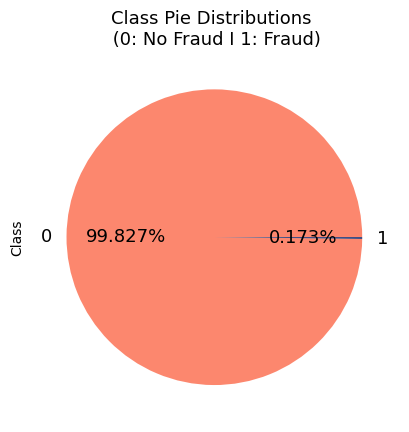

In [11]:
# Distrubitons pie graph
count_classes = pd.value_counts(card_data["Class"], sort = True).sort_index()
count_classes.plot(kind = "pie", autopct="%.3f%%", fontsize=13, colors=colors)
plt.title("Class Pie Distributions \n (0: No Fraud I 1: Fraud)", fontsize=13)

Text(0.5, 1.0, 'Class Bar Distributions \n (0: No Fraud I 1: Fraud)')

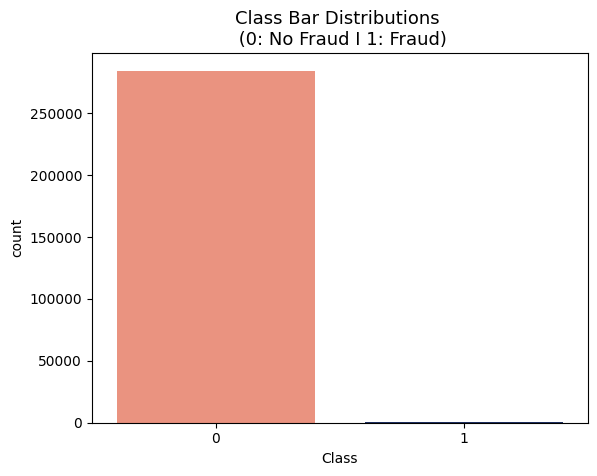

In [12]:
# Distrubitons bar graph
sns.countplot(x=card_data["Class"], palette=colors)
plt.title("Class Bar Distributions \n (0: No Fraud I 1: Fraud)", fontsize=13)

Text(0.5, 1.0, 'Distribution of Transaction Amount')

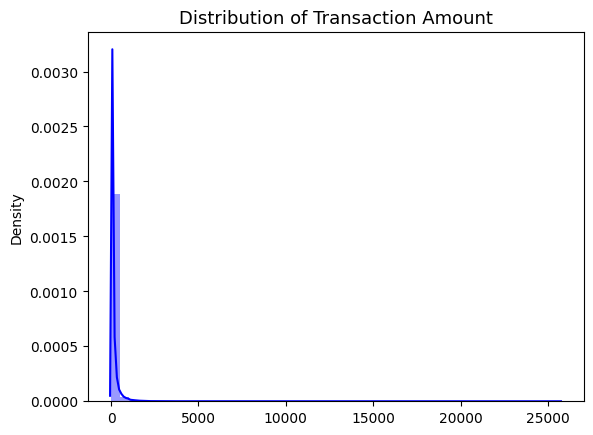

In [13]:
amount_values = card_data["Amount"].values
sns.distplot(amount_values, color="b")
plt.title("Distribution of Transaction Amount", fontsize=13)

Text(0.5, 1.0, 'Distribution of Transaction Time')

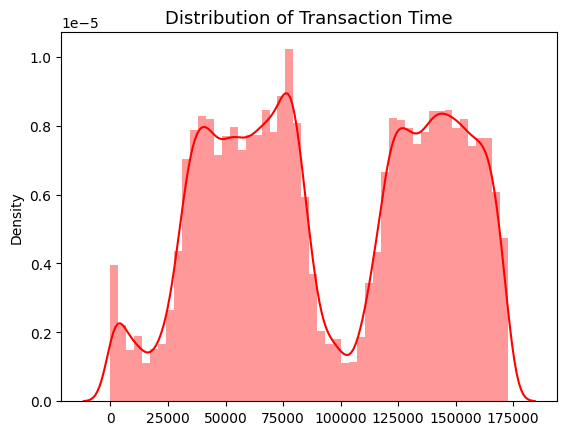

In [14]:
time_values = card_data["Time"].values
sns.distplot(time_values, color="r")
plt.title("Distribution of Transaction Time", fontsize=13)

In [15]:
# Have to scale amount and time features

# Robust Scaler more consistent than the Standard Scaler to the outliers
robust_scaler = RobustScaler()

amount = card_data["Amount"].values
card_data["scaled_amount"] = robust_scaler.fit_transform(card_data["Amount"].values.reshape(-1,1))
card_data["scaled_time"] = robust_scaler.fit_transform(card_data["Time"].values.reshape(-1,1))

In [16]:
# Before adding scaled features, drop the non scaling features
card_data.drop(["Time", "Amount"], axis=1, inplace=True)

In [17]:
# Time and amount should be scaled as the other columns
scaled_amount = card_data["scaled_amount"]
scaled_time = card_data["scaled_time"]

card_data.drop(["scaled_amount", "scaled_time"], axis=1, inplace=True)
card_data.insert(0, "scaled_amount", scaled_amount)
card_data.insert(1, "scaled_time", scaled_time)

card_data.head(10)

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   
5      -0.256131    -0.994960 -0.425966  0.960523  1.141109 -0.168252   
6      -0.237686    -0.994937  1.229658  0.141004  0.045371  1.202613   
7       0.262698    -0.994901 -0.644269  1.417964  1.074380 -0.492199   
8       0.994900    -0.994901 -0.894286  0.286157 -0.113192 -0.271526   
9      -0.255991    -0.994878 -0.338262  1.119593  1.044367 -0.222187   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   
5  0.420987 -0.029728  0.476201  0.260314  ...  0.084968 -0.208254 -0.559825   
6  0.191881  0.272708 -0.005159  0.081213  ... -0.219633 -0.167716 -0.270710   
7  0.948934  0.428118  1.120631 -3.807864  ... -0.156742  1.943465 -1.015455   
8  2.669599  3.721818  0.370145  0.851084  ...  0.052736 -0.073425 -0.268092   
9  0.499361 -0.246761  0.651583  0.069539  ...  0.203711 -0.246914 -0.633753   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  
5 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080      0  
6 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168      0  
7  0.057504 -0.649709 -0.415267 -0.051634 -1.206921 -1.085339      0  
8 -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404      0  
9 -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076      0  

[10 rows x 31 columns]

In [18]:
# Data set shape after the changings
print(card_data.shape)

(284807, 31)


<Axes: >

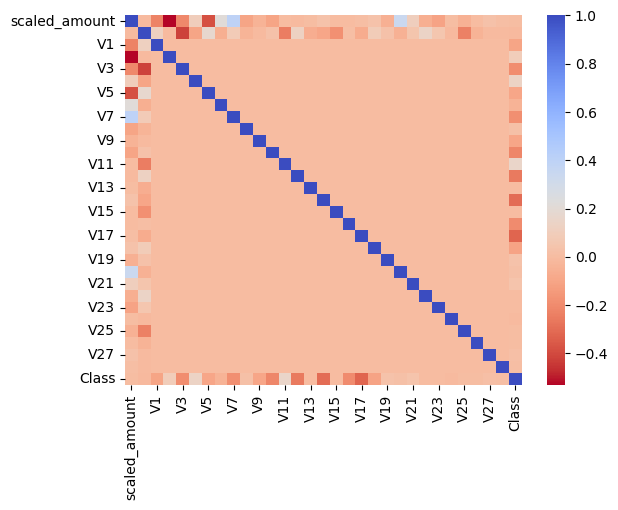

In [19]:
# Data set heatmap
sns.heatmap(card_data.corr(), cmap="coolwarm_r", annot_kws={"size":33})

In [20]:
X = card_data.drop(["Class"], axis=1)
y = card_data["Class"]

In [21]:
# Dividing data set randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
# Defining labels before using the confusion matrix 
labels= ["Valid", "Fraud"]

#  Decision Tree

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_decision_tree_score = np.array([])
decision_tree_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 2
ending = 101
step_size = 2

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    decision_tree = DecisionTreeClassifier(max_depth = i, criterion = "entropy", random_state = 42)
    decision_tree.fit(X_train, y_train)
    decision_tree_yhat = decision_tree.predict(X_test)
    best_dt_scores = [accuracy_score(y_test, decision_tree_yhat), f1_score(y_test, decision_tree_yhat), precision_score(y_test, decision_tree_yhat), recall_score(y_test, decision_tree_yhat), roc_auc_score(y_test, decision_tree_yhat)]
    best_decision_tree_score = np.concatenate((best_decision_tree_score, best_dt_scores))

    # Every max_depth values stores in a confusion matrix array
    decision_tree_confusion_matrix = np.concatenate((decision_tree_confusion_matrix, confusion_matrix(y_test, decision_tree_yhat, labels = [0, 1]).ravel()))
# confusion matrix, array to matrix
best_decision_tree_score = best_decision_tree_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_decision_tree_score = np.array([best_decision_tree_score[0,:]]).T
f1_decision_tree_score = np.array([best_decision_tree_score[1,:]]).T
precision_decision_tree_score = np.array([best_decision_tree_score[2,:]]).T
recall_decision_tree_score = np.array([best_decision_tree_score[3,:]]).T
roc_auc_decision_tree_score = np.array([best_decision_tree_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

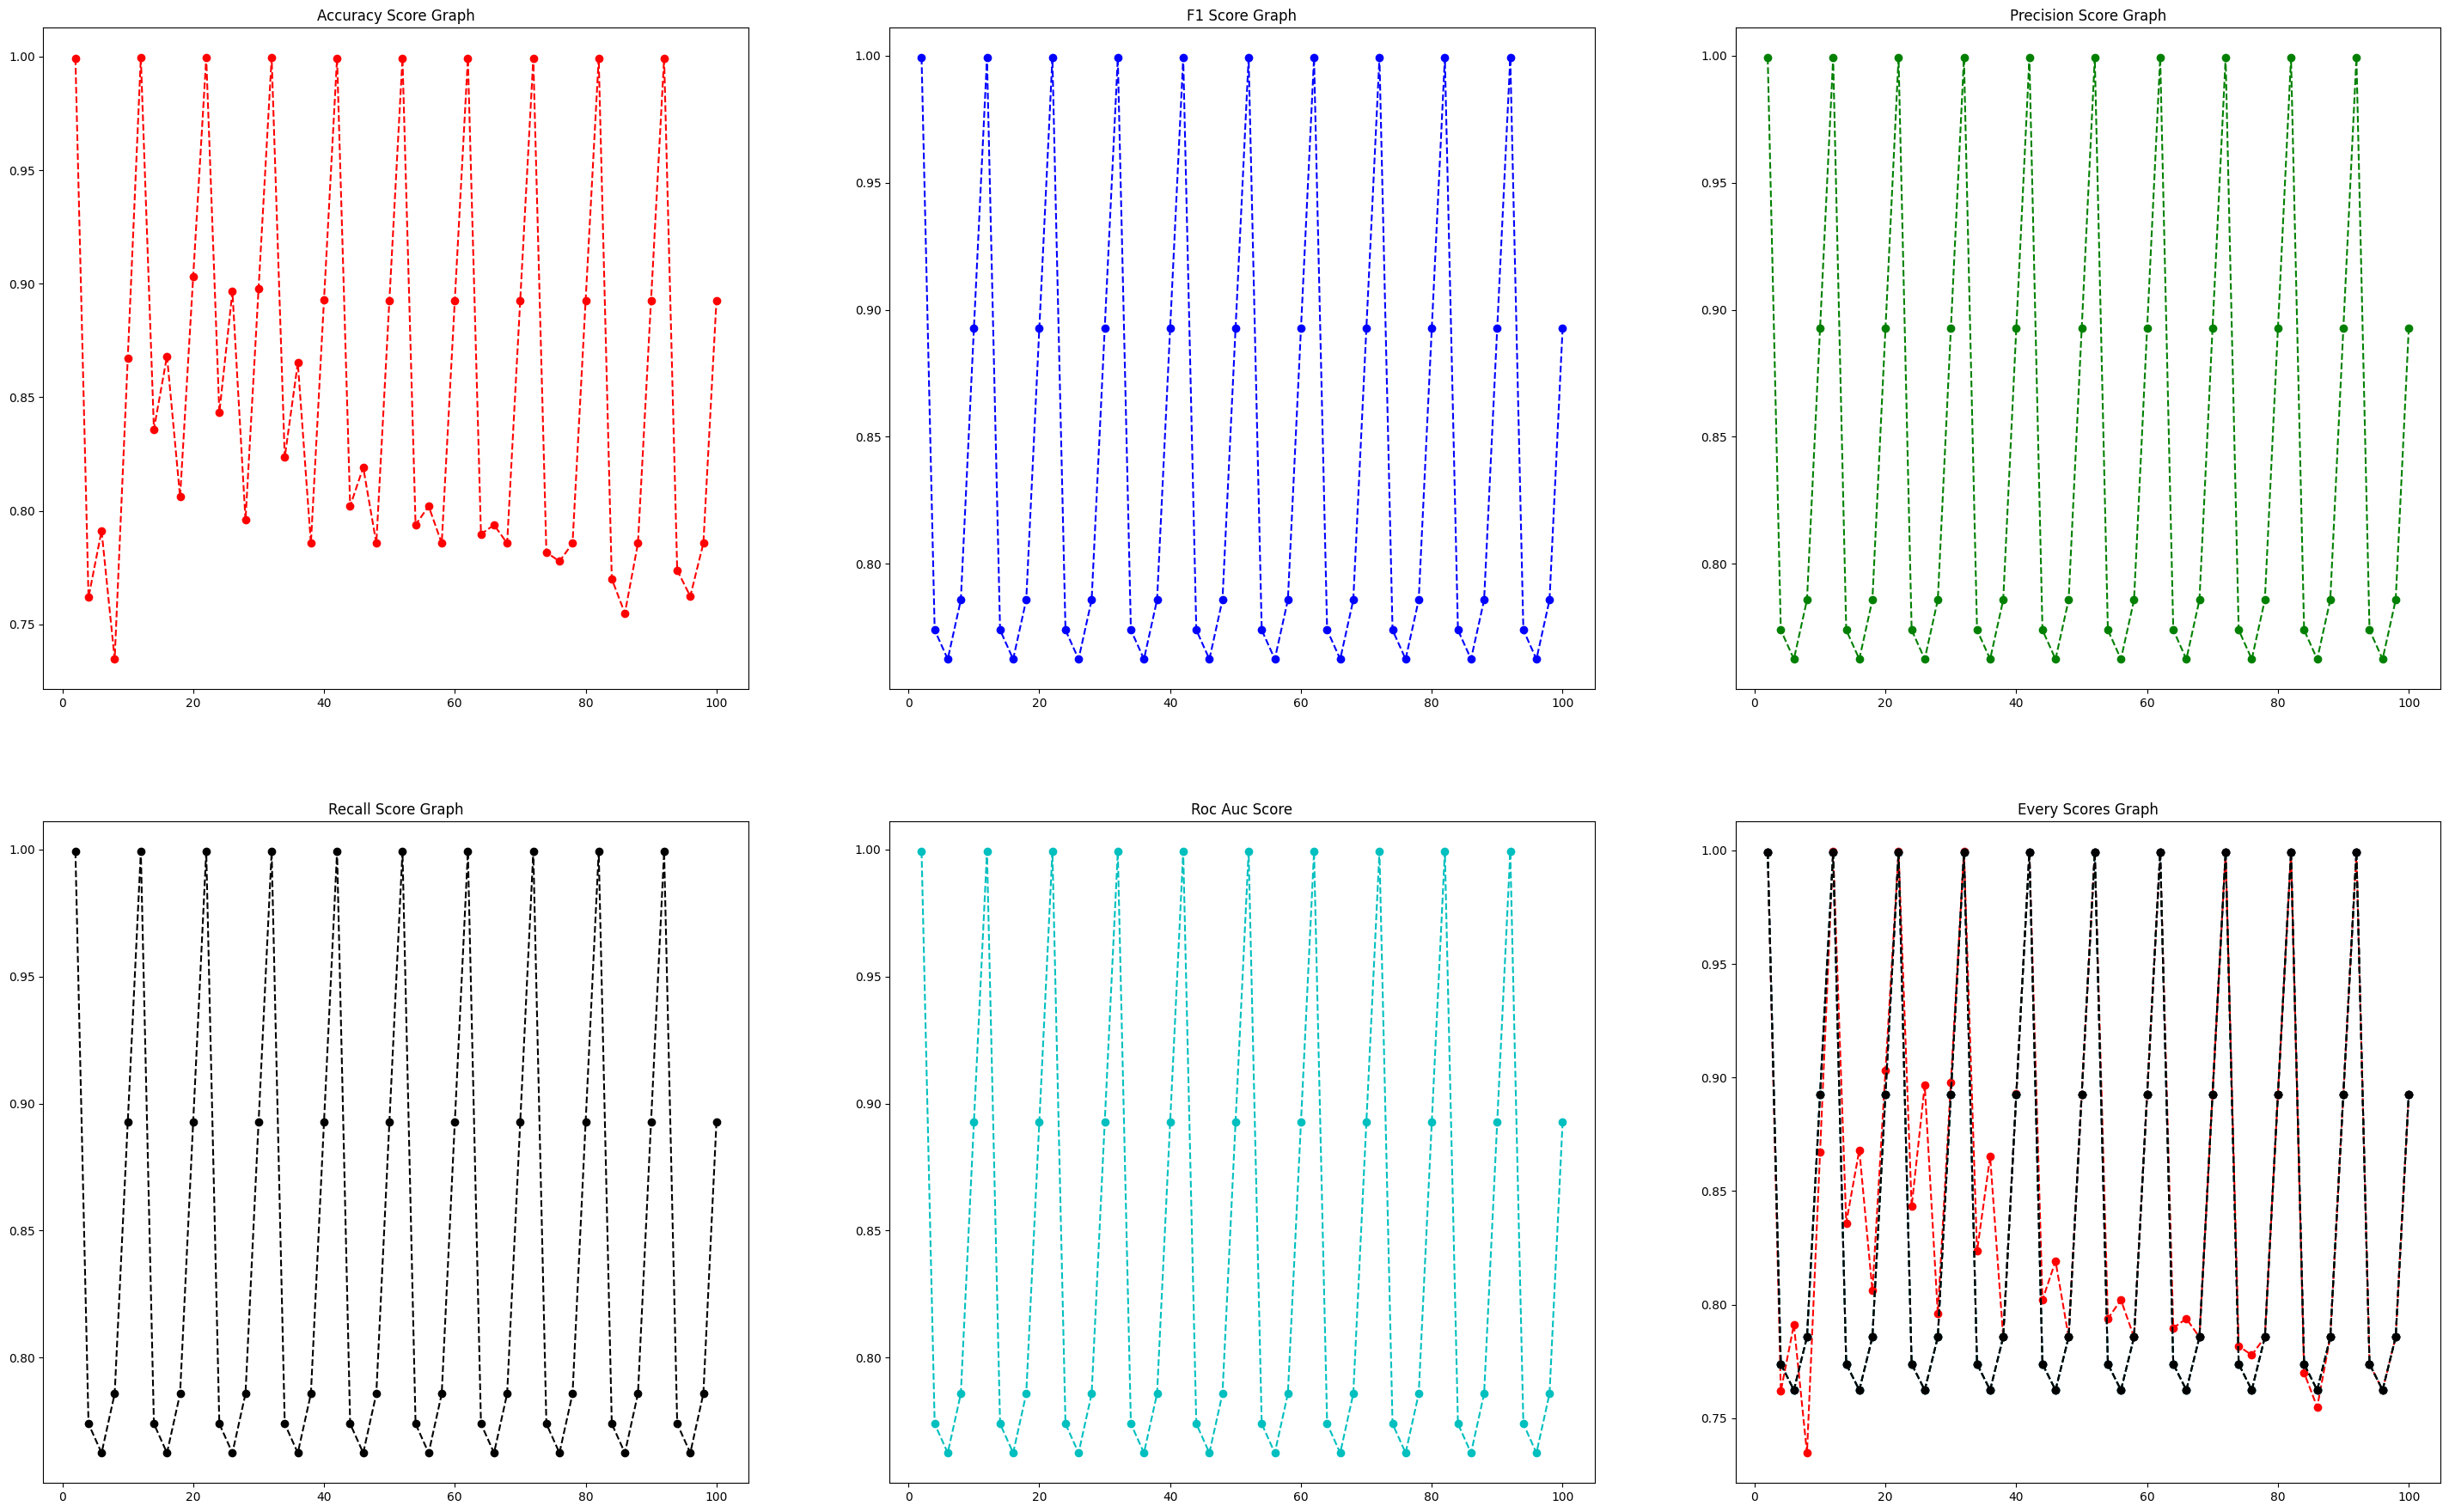

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_decision_tree_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_decision_tree_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_decision_tree_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_decision_tree_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_decision_tree_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_decision_tree_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_decision_tree_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_decision_tree_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_decision_tree_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_dt_score_with_acc = best_decision_tree_score.sum(axis=0)
print("Best score sum with accuracy = ", best_dt_score_with_acc.max()*100)

# Best score sum without accuracy
best_dt_score_without_acc = np.delete(best_decision_tree_score, 0, axis = 0)
best_dt_score_without_acc = best_dt_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_dt_score_without_acc.max()*100)

Best score sum with accuracy =  499.63308872581723
Best score sum without accuracy =  399.68399985955546


In [ ]:
# Best score sum with accuracy index number
best_dt_score_with_acc.argmax()

10

In [ ]:
# Best score sum without accuracy index number
best_dt_score_without_acc.argmax()

0

Accuracy score of the Decision Tree model is [99.94908887]
F1 score of the Decision Tree model is [99.92099996]
Precision score of the Decision Tree model is [99.92099996]
Recall score of the Decision Tree model is [99.92099996]
ROC score of the Decision Tree model is [99.92099996]:


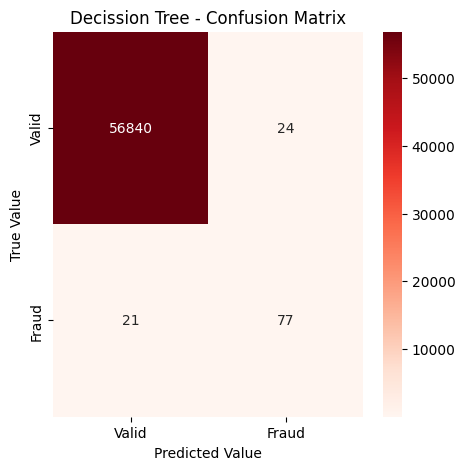

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the Decision Tree model is {}".format((accuracy_decision_tree_score[best_dt_score_with_acc.argmax()]*100)))
print("F1 score of the Decision Tree model is {}".format(f1_decision_tree_score[best_dt_score_with_acc.argmax()]*100))
print("Precision score of the Decision Tree model is {}".format(precision_decision_tree_score[best_dt_score_with_acc.argmax()]*100))
print("Recall score of the Decision Tree model is {}".format(recall_decision_tree_score[best_dt_score_with_acc.argmax()]*100))
print("ROC score of the Decision Tree model is {}:".format(roc_auc_decision_tree_score[best_dt_score_with_acc.argmax()]*100))

# Best learning scores decision tree
decision_tree_confusion_matrix = decision_tree_confusion_matrix.reshape((round((ending-beginning)/step_size),4))
decision_tree_confusion_matrix = decision_tree_confusion_matrix[best_dt_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(decision_tree_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Decission Tree - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Decision Tree and index
best_acc_score_dt = best_decision_tree_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_dt.argmax()))
print("Best accuracy score hyperparameter max depth {}".format(best_acc_score_dt.argmax()*2+2))
print("Best accuracy score of the Decision Tree model {}".format(best_acc_score_dt[best_acc_score_dt.argmax()]*100))

Best accuracy score index 10
Best accuracy score hyperparameter max depth 22
Best accuracy score of the Decision Tree model 99.94908886626172


# Random Forest Classifier

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_random_forest_score = np.array([])
random_forest_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 2
ending = 101
step_size = 2

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    random_forest = RandomForestClassifier(max_depth = i, criterion = "entropy", n_estimators=100)
    random_forest.fit(X_train, y_train)
    random_forest_yhat = random_forest.predict(X_test)
    best_rf_scores = [accuracy_score(y_test, random_forest_yhat), f1_score(y_test, random_forest_yhat), precision_score(y_test, random_forest_yhat), recall_score(y_test, random_forest_yhat), roc_auc_score(y_test, random_forest_yhat)]
    best_random_forest_score = np.concatenate((best_random_forest_score, best_rf_scores))

    # Every max_depth values stores in a confusion matrix array
    random_forest_confusion_matrix = np.concatenate((random_forest_confusion_matrix, confusion_matrix(y_test, random_forest_yhat, labels = [0, 1]).ravel()))
# confusion matrix, array to matrix
best_random_forest_score = best_random_forest_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_random_forest_score = np.array([best_random_forest_score[0,:]]).T
f1_random_forest_score = np.array([best_random_forest_score[1,:]]).T
precision_random_forest_score = np.array([best_random_forest_score[2,:]]).T
recall_random_forest_score = np.array([best_random_forest_score[3,:]]).T
roc_auc_random_forest_score = np.array([best_random_forest_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

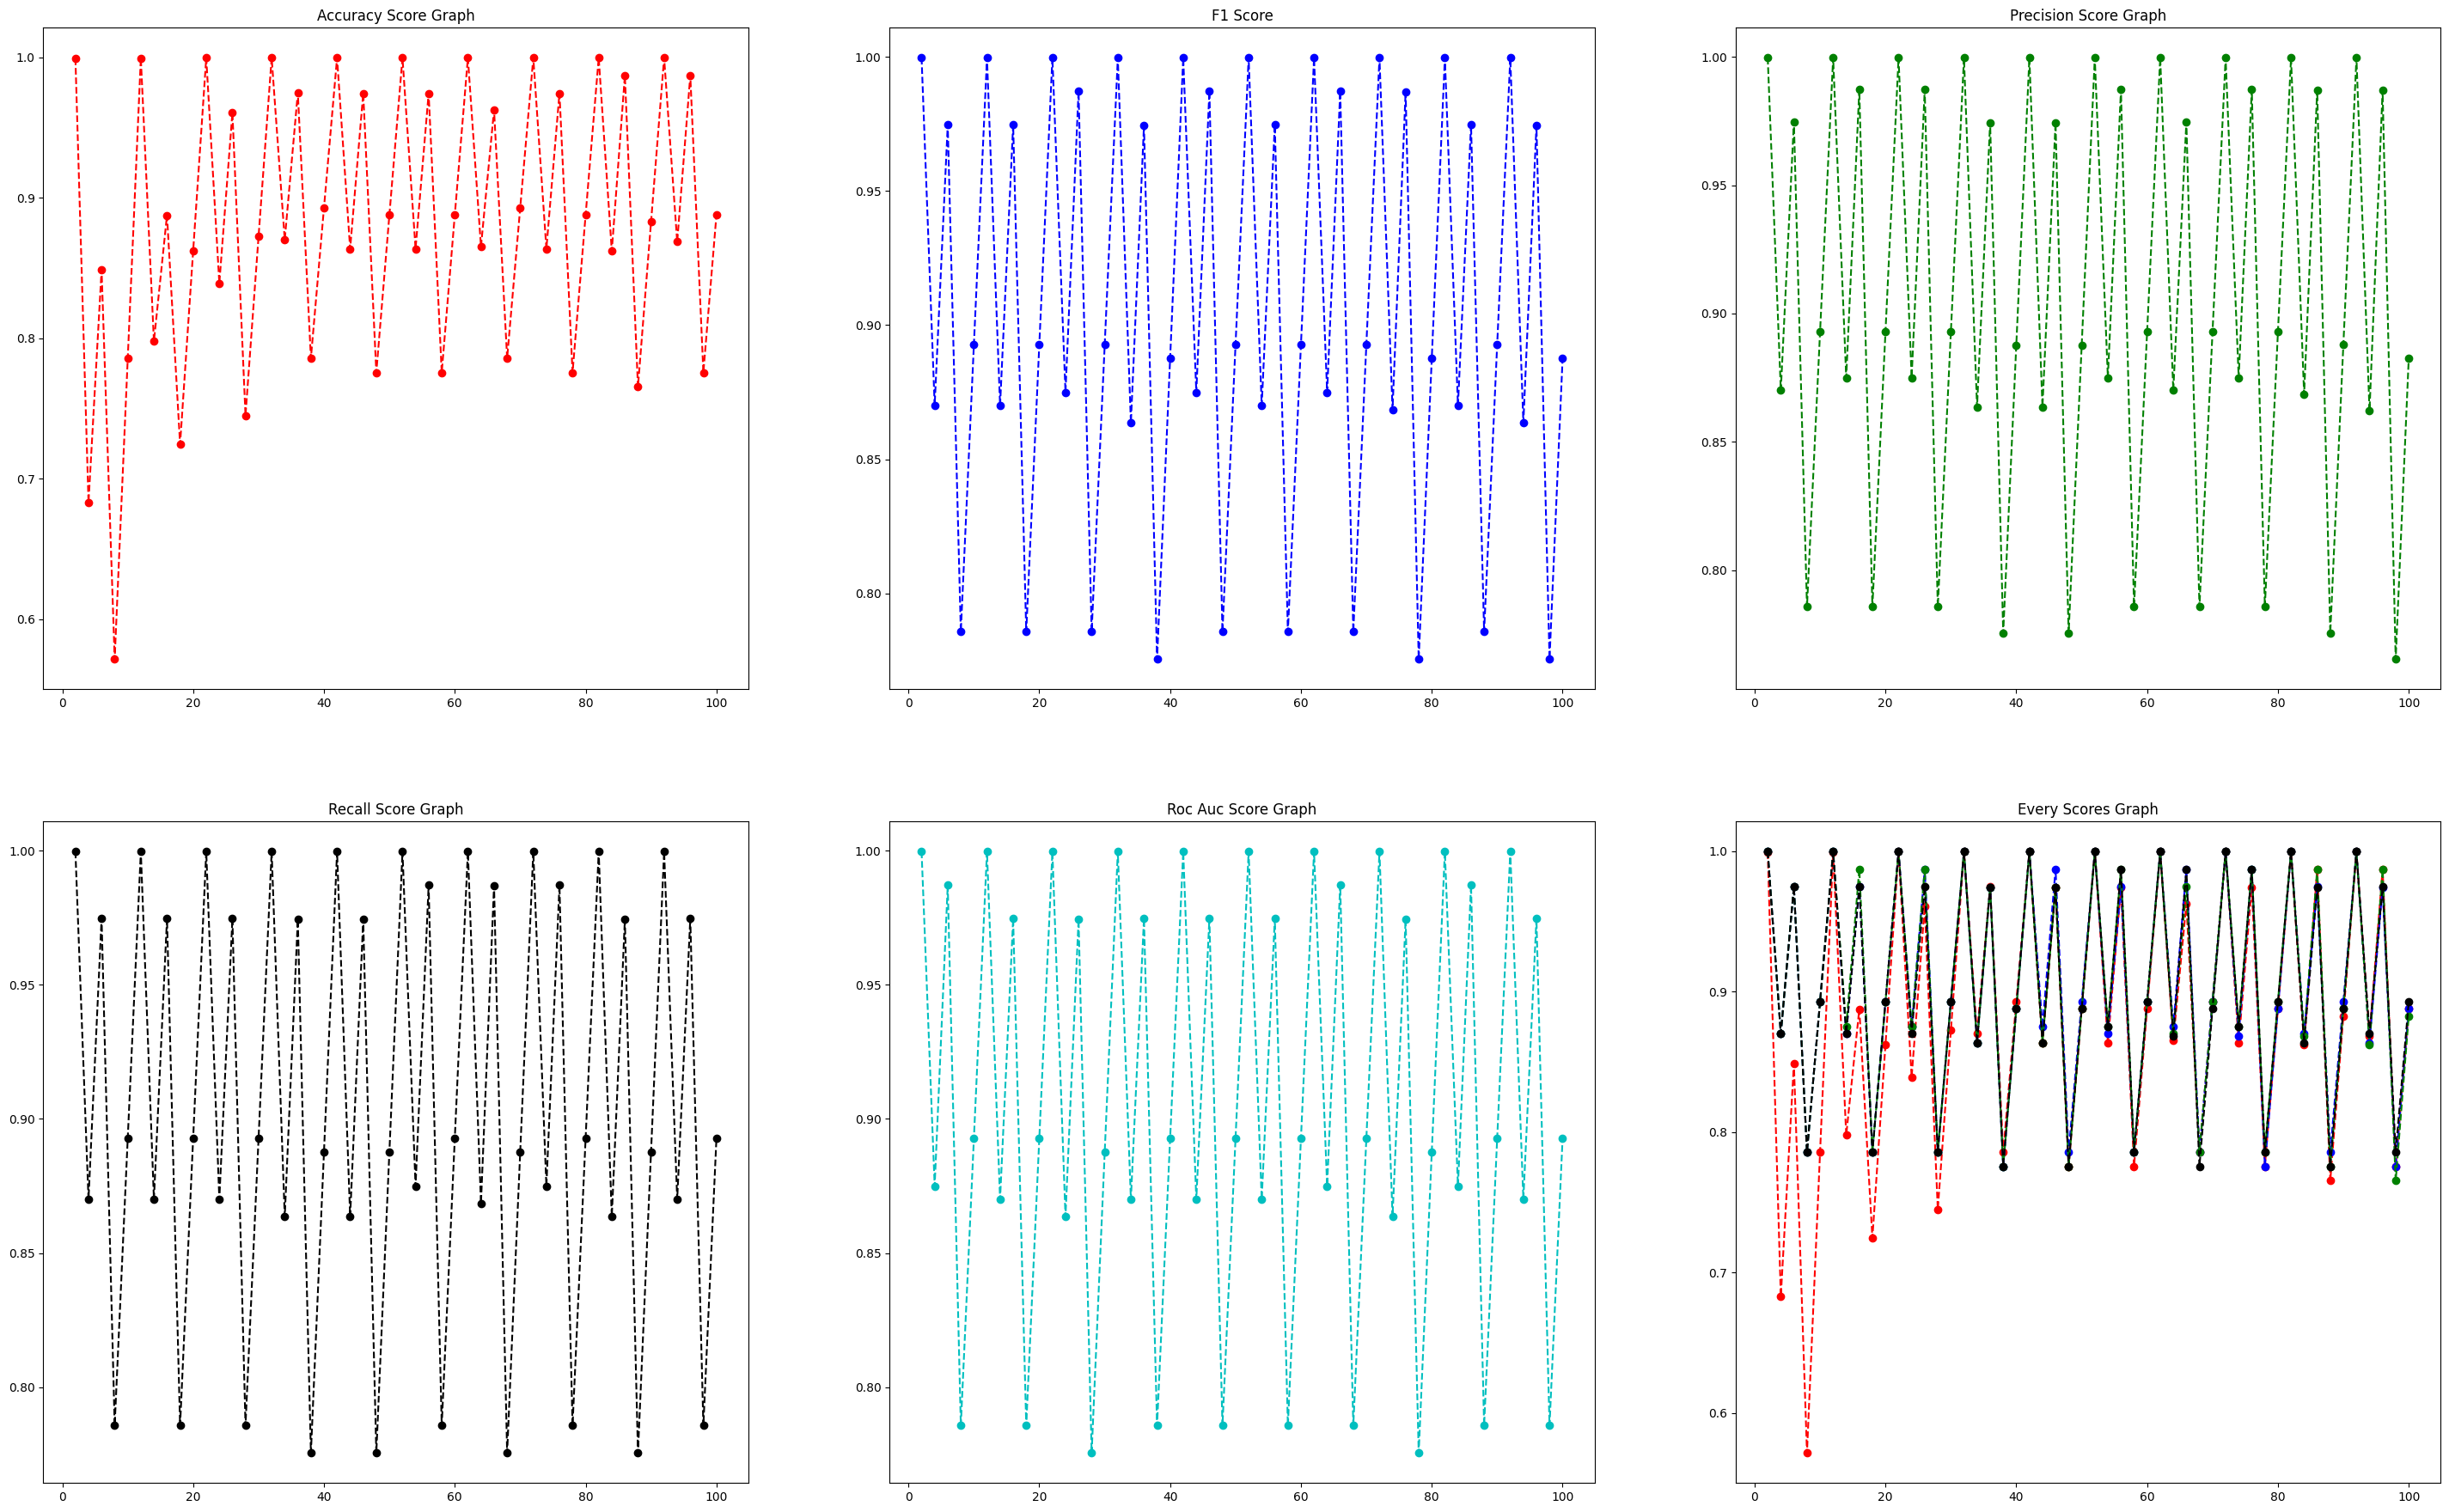

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_random_forest_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_random_forest_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_random_forest_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_random_forest_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_random_forest_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_random_forest_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_random_forest_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_random_forest_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_random_forest_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_rf_score_with_acc = best_random_forest_score.sum(axis=0)
print("Best score sum with accuracy = ", best_rf_score_with_acc.max()*100)

# Best score sum without accuracy
best_rf_score_without_acc = np.delete(best_random_forest_score, 0, axis = 0)
best_rf_score_without_acc = best_rf_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_rf_score_without_acc.max()*100)

Best score sum with accuracy =  499.79986657771843
Best score sum without accuracy =  399.8419999297778


In [ ]:
# Best score sum with accuracy index number
best_rf_score_with_acc.argmax()

25

In [ ]:
# Best score sum without accuracy index number
best_rf_score_without_acc.argmax()

25

Accuracy score of the Random Forest model is [99.95786665]
F1 score of the Random Forest model is [99.9596222]
Precision score of the Random Forest model is [99.96137776]
Recall score of the Random Forest model is [99.96137776]
ROC score of the Random Forest model is [99.9596222]:


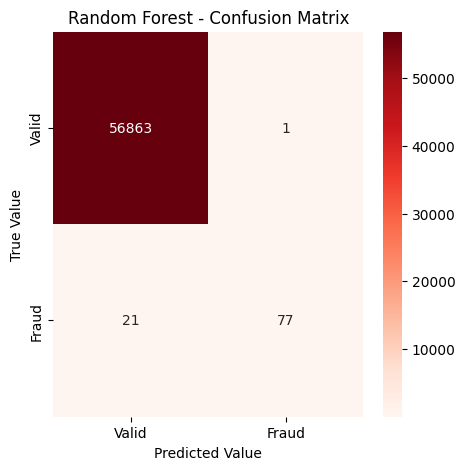

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the Random Forest model is {}".format((accuracy_random_forest_score[best_rf_score_with_acc.argmax()]*100)))
print("F1 score of the Random Forest model is {}".format(f1_random_forest_score[best_rf_score_with_acc.argmax()]*100))
print("Precision score of the Random Forest model is {}".format(precision_random_forest_score[best_rf_score_with_acc.argmax()]*100))
print("Recall score of the Random Forest model is {}".format(recall_random_forest_score[best_rf_score_with_acc.argmax()]*100))
print("ROC score of the Random Forest model is {}:".format(roc_auc_random_forest_score[best_rf_score_with_acc.argmax()]*100))

# Best learning scores Random Forest
random_forest_confusion_matrix = random_forest_confusion_matrix.reshape((round((ending-beginning)/step_size),4))
random_forest_confusion_matrix = random_forest_confusion_matrix[best_rf_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(random_forest_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Random Forest - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Random Forest
best_acc_score_rf = best_random_forest_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_rf.argmax()))
print("Best accuracy score hyperparameter max_depth {}".format(best_acc_score_rf.argmax()*2+2))
print("Best accuracy score of the Random Forest model {}".format(best_acc_score_rf[best_acc_score_rf.argmax()]*100))

Best accuracy score index 15
Best accuracy score hyperparameter max_depth 32
Best accuracy score of the Random Forest model 99.95962220427653


# Knn

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_knn_score = np.array([])
knn_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 3
ending = 103
step_size = 2

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    knn = KNeighborsClassifier(weights = "distance", n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_yhat = knn.predict(X_test)
    best_knn_scores = [accuracy_score(y_test, knn_yhat), f1_score(y_test, knn_yhat), precision_score(y_test, knn_yhat), recall_score(y_test, knn_yhat), roc_auc_score(y_test, knn_yhat)]
    best_knn_score = np.concatenate((best_knn_score, best_knn_scores))
    
    # Every k values stores in a confusion matrix array
    knn_confusion_matrix = np.concatenate((knn_confusion_matrix, confusion_matrix(y_test, knn_yhat, labels = [0, 1]).ravel()))

# confusion matrix, array to matrix
best_knn_score = best_knn_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_knn_score = np.array([best_knn_score[0,:]]).T
f1_knn_score = np.array([best_knn_score[1,:]]).T
precision_knn_score = np.array([best_knn_score[2,:]]).T
recall_knn_score = np.array([best_knn_score[3,:]]).T
roc_auc_knn_score = np.array([best_knn_score[4,:]]).T


Text(0.5, 1.0, 'Every Scores Graph')

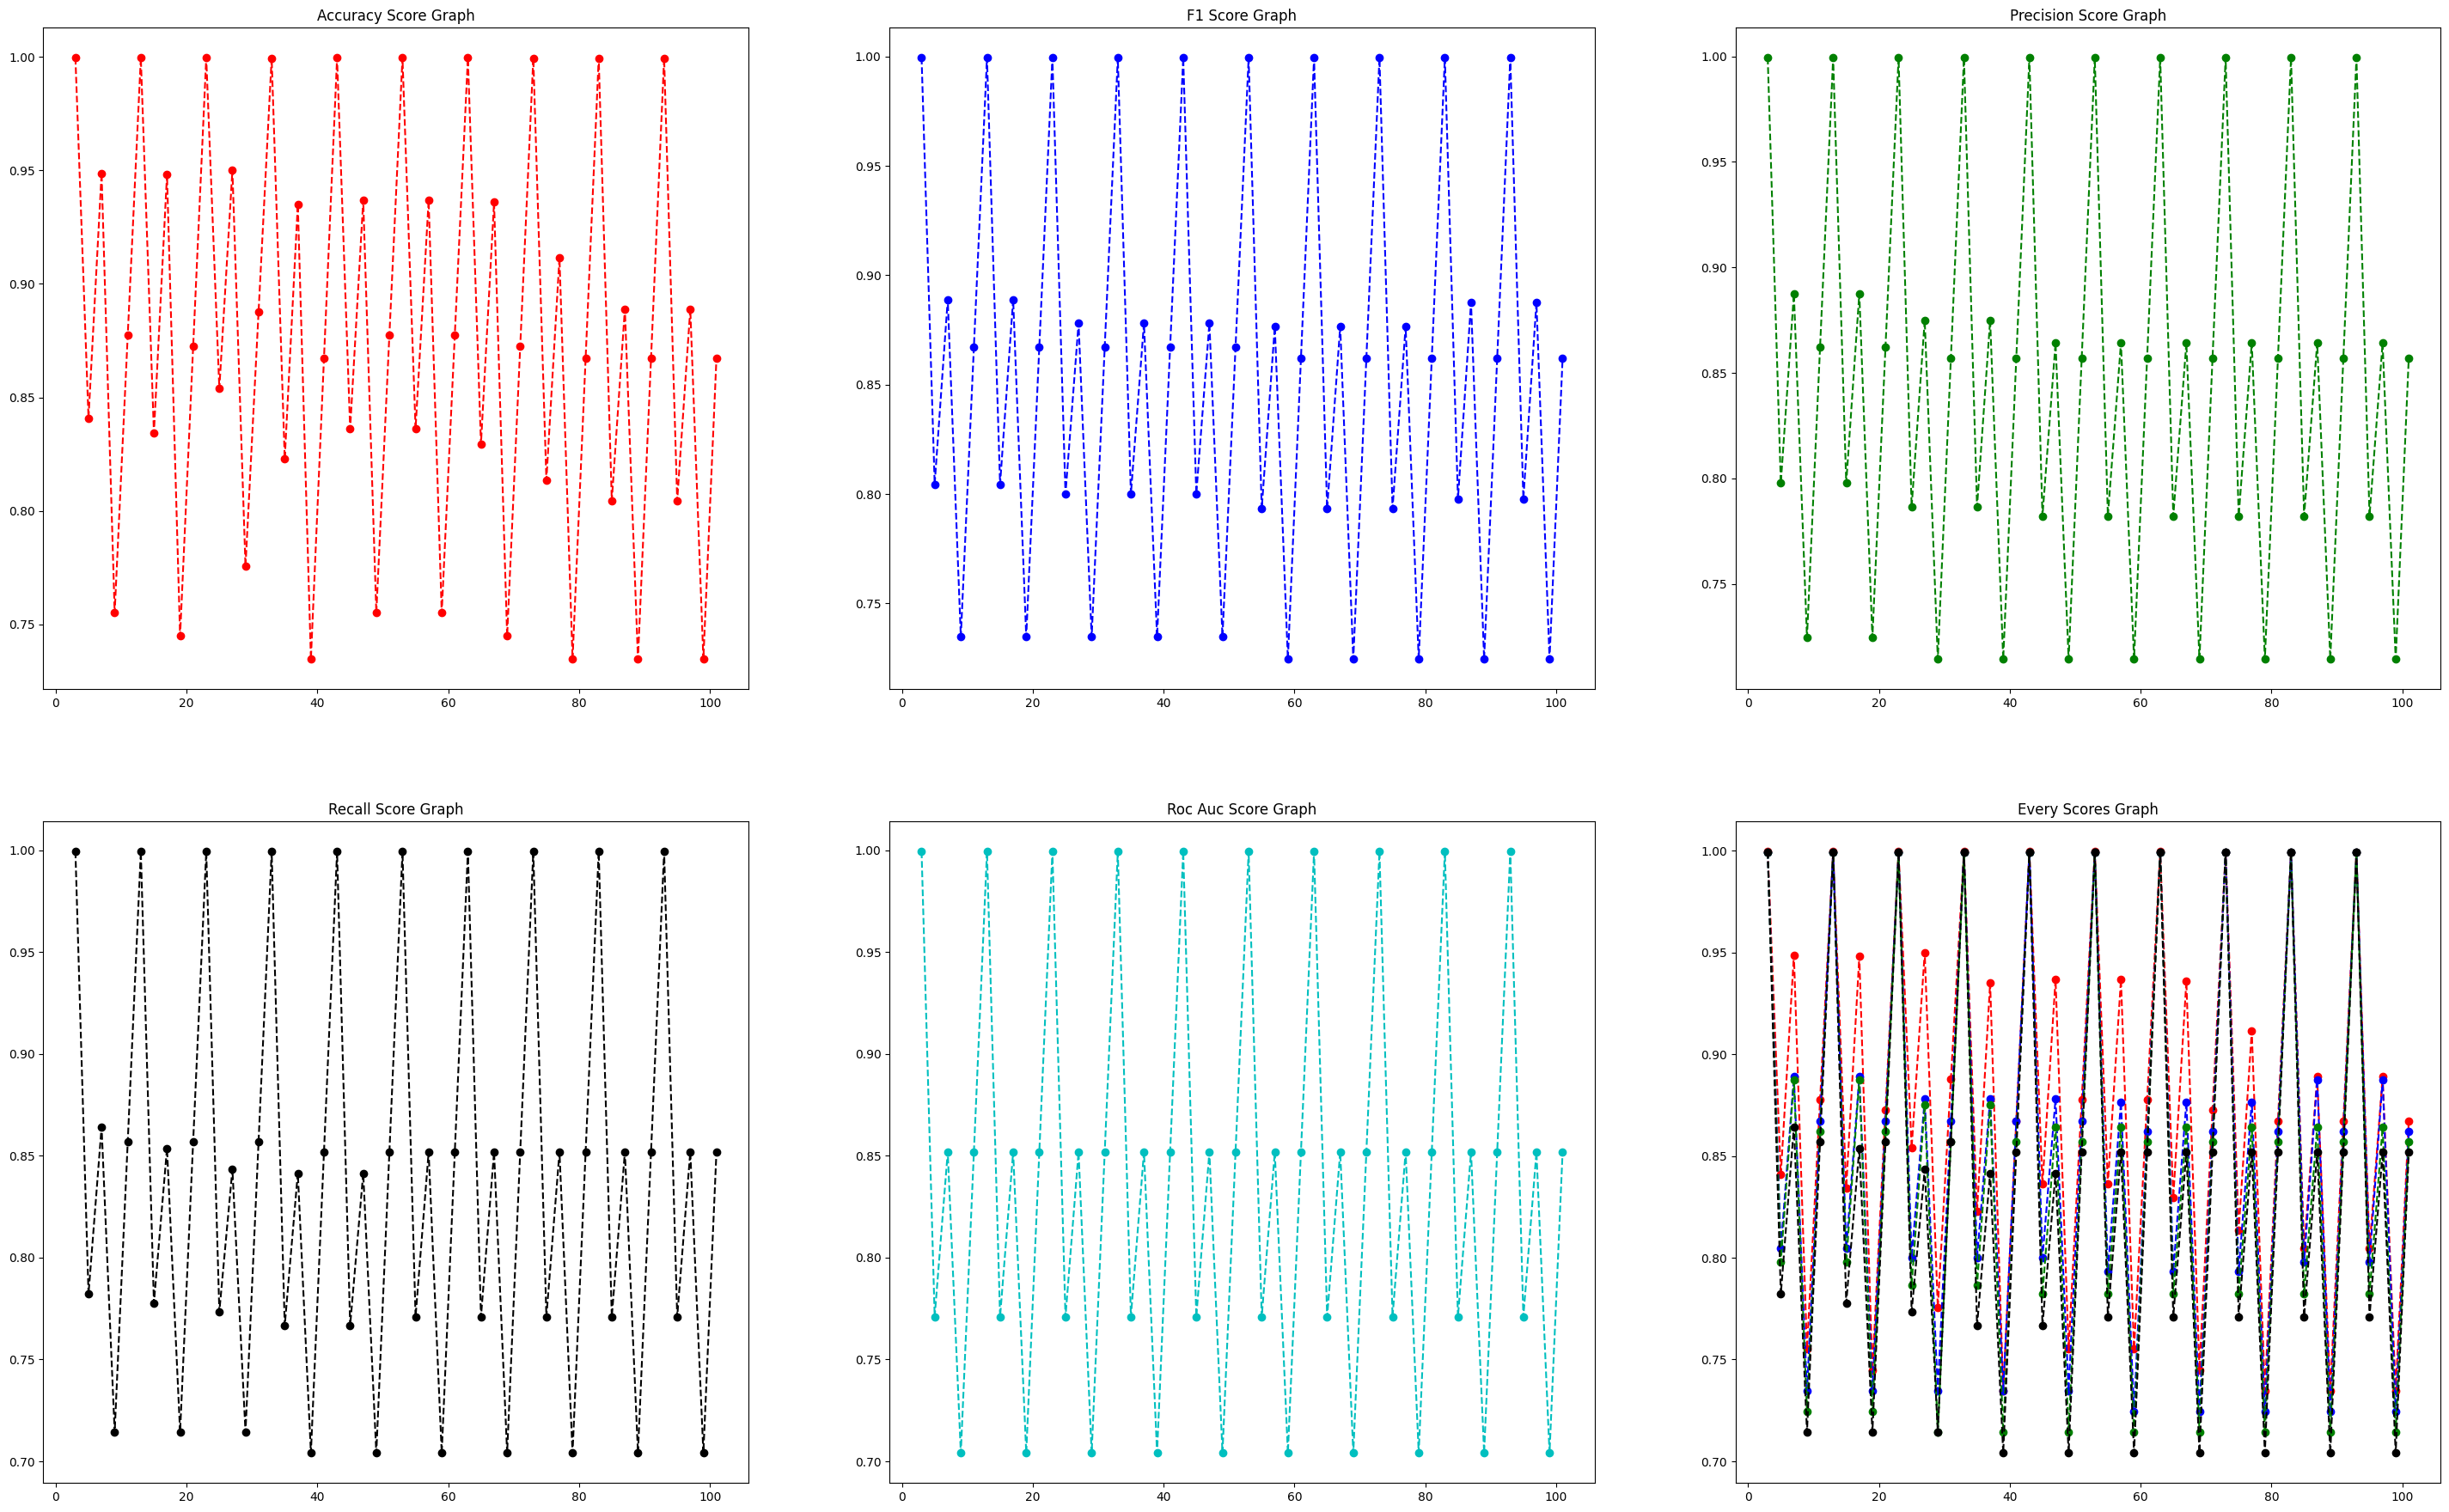

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_knn_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_knn_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_knn_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_knn_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_knn_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_knn_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_knn_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_knn_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_knn_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_knn_score_with_acc = best_knn_score.sum(axis=0)
print("Best score sum with accuracy = ", best_knn_score_with_acc.max()*100)

# Best score sum without accuracy
best_knn_score_without_acc = np.delete(best_knn_score, 0, axis = 0)
best_knn_score_without_acc = best_knn_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_knn_score_without_acc.max()*100)

Best score sum with accuracy =  499.68575541589126
Best score sum without accuracy =  399.7349109932938


In [ ]:
# Best score sum with accuracy index number
best_knn_score_with_acc.argmax()

0

In [ ]:
# Best score sum without accuracy index number
best_knn_score_without_acc.argmax()

0

Accuracy score of the Knn model is [99.95084442]
F1 score of the Knn model is [99.93855553]
Precision score of the Knn model is [99.93679997]
Recall score of the Knn model is [99.9315333]
ROC score of the Knn model is [99.92802219]:


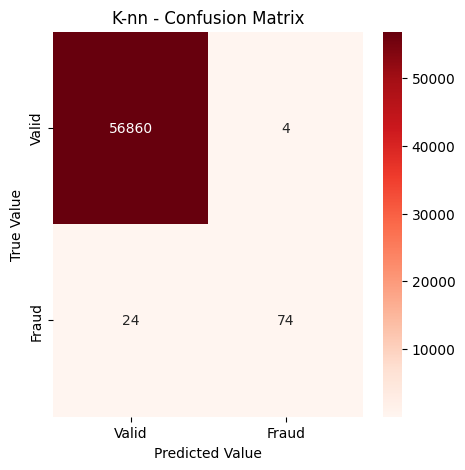

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the Knn model is {}".format((accuracy_knn_score[best_knn_score_with_acc.argmax()]*100)))
print("F1 score of the Knn model is {}".format(f1_knn_score[best_knn_score_with_acc.argmax()]*100))
print("Precision score of the Knn model is {}".format(precision_knn_score[best_knn_score_with_acc.argmax()]*100))
print("Recall score of the Knn model is {}".format(recall_knn_score[best_knn_score_with_acc.argmax()]*100))
print("ROC score of the Knn model is {}:".format(roc_auc_knn_score[best_knn_score_with_acc.argmax()]*100))

# Best learning scores Knn
knn_confusion_matrix = knn_confusion_matrix.reshape(round((ending-beginning)/step_size),4)
knn_confusion_matrix = knn_confusion_matrix[best_knn_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(knn_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("K-nn - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Knn
best_acc_score_knn = best_knn_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_knn.argmax()))
print("Best accuracy score hyperparameter k value {}".format(best_acc_score_knn.argmax()*2+3))
print("Best Accuracy score of the Knn model {}".format(best_acc_score_knn[best_acc_score_knn.argmax()]*100))

Best accuracy score index 10
Best accuracy score hyperparameter k value 23
Best Accuracy score of the Knn model 99.95435553526913


# Logistic Regression

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_logistic_regression_score = np.array([])
logistic_regression_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 1
ending = 101
step_size = 2

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    logistic_regression = LogisticRegression(C = i, random_state=42)
    logistic_regression.fit(X_train, y_train)
    logistic_regression_yhat = logistic_regression.predict(X_test)
    best_logistic_regression_scores = [accuracy_score(y_test, logistic_regression_yhat), f1_score(y_test, logistic_regression_yhat), precision_score(y_test, logistic_regression_yhat), recall_score(y_test, logistic_regression_yhat), roc_auc_score(y_test, logistic_regression_yhat)]
    best_logistic_regression_score = np.concatenate((best_logistic_regression_score, best_logistic_regression_scores))
    
    # Every k values stores in a confusion matrix array
    logistic_regression_confusion_matrix = np.concatenate((logistic_regression_confusion_matrix, confusion_matrix(y_test, logistic_regression_yhat, labels = [0, 1]).ravel()))

# confusion matrix, array to matrix
best_logistic_regression_score = best_logistic_regression_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_logistic_regression_score = np.array([best_logistic_regression_score[0,:]]).T
f1_logistic_regression_score = np.array([best_logistic_regression_score[1,:]]).T
precision_logistic_regression_score = np.array([best_logistic_regression_score[2,:]]).T
recall_logistic_regression_score = np.array([best_logistic_regression_score[3,:]]).T
roc_auc_logistic_regression_score = np.array([best_logistic_regression_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

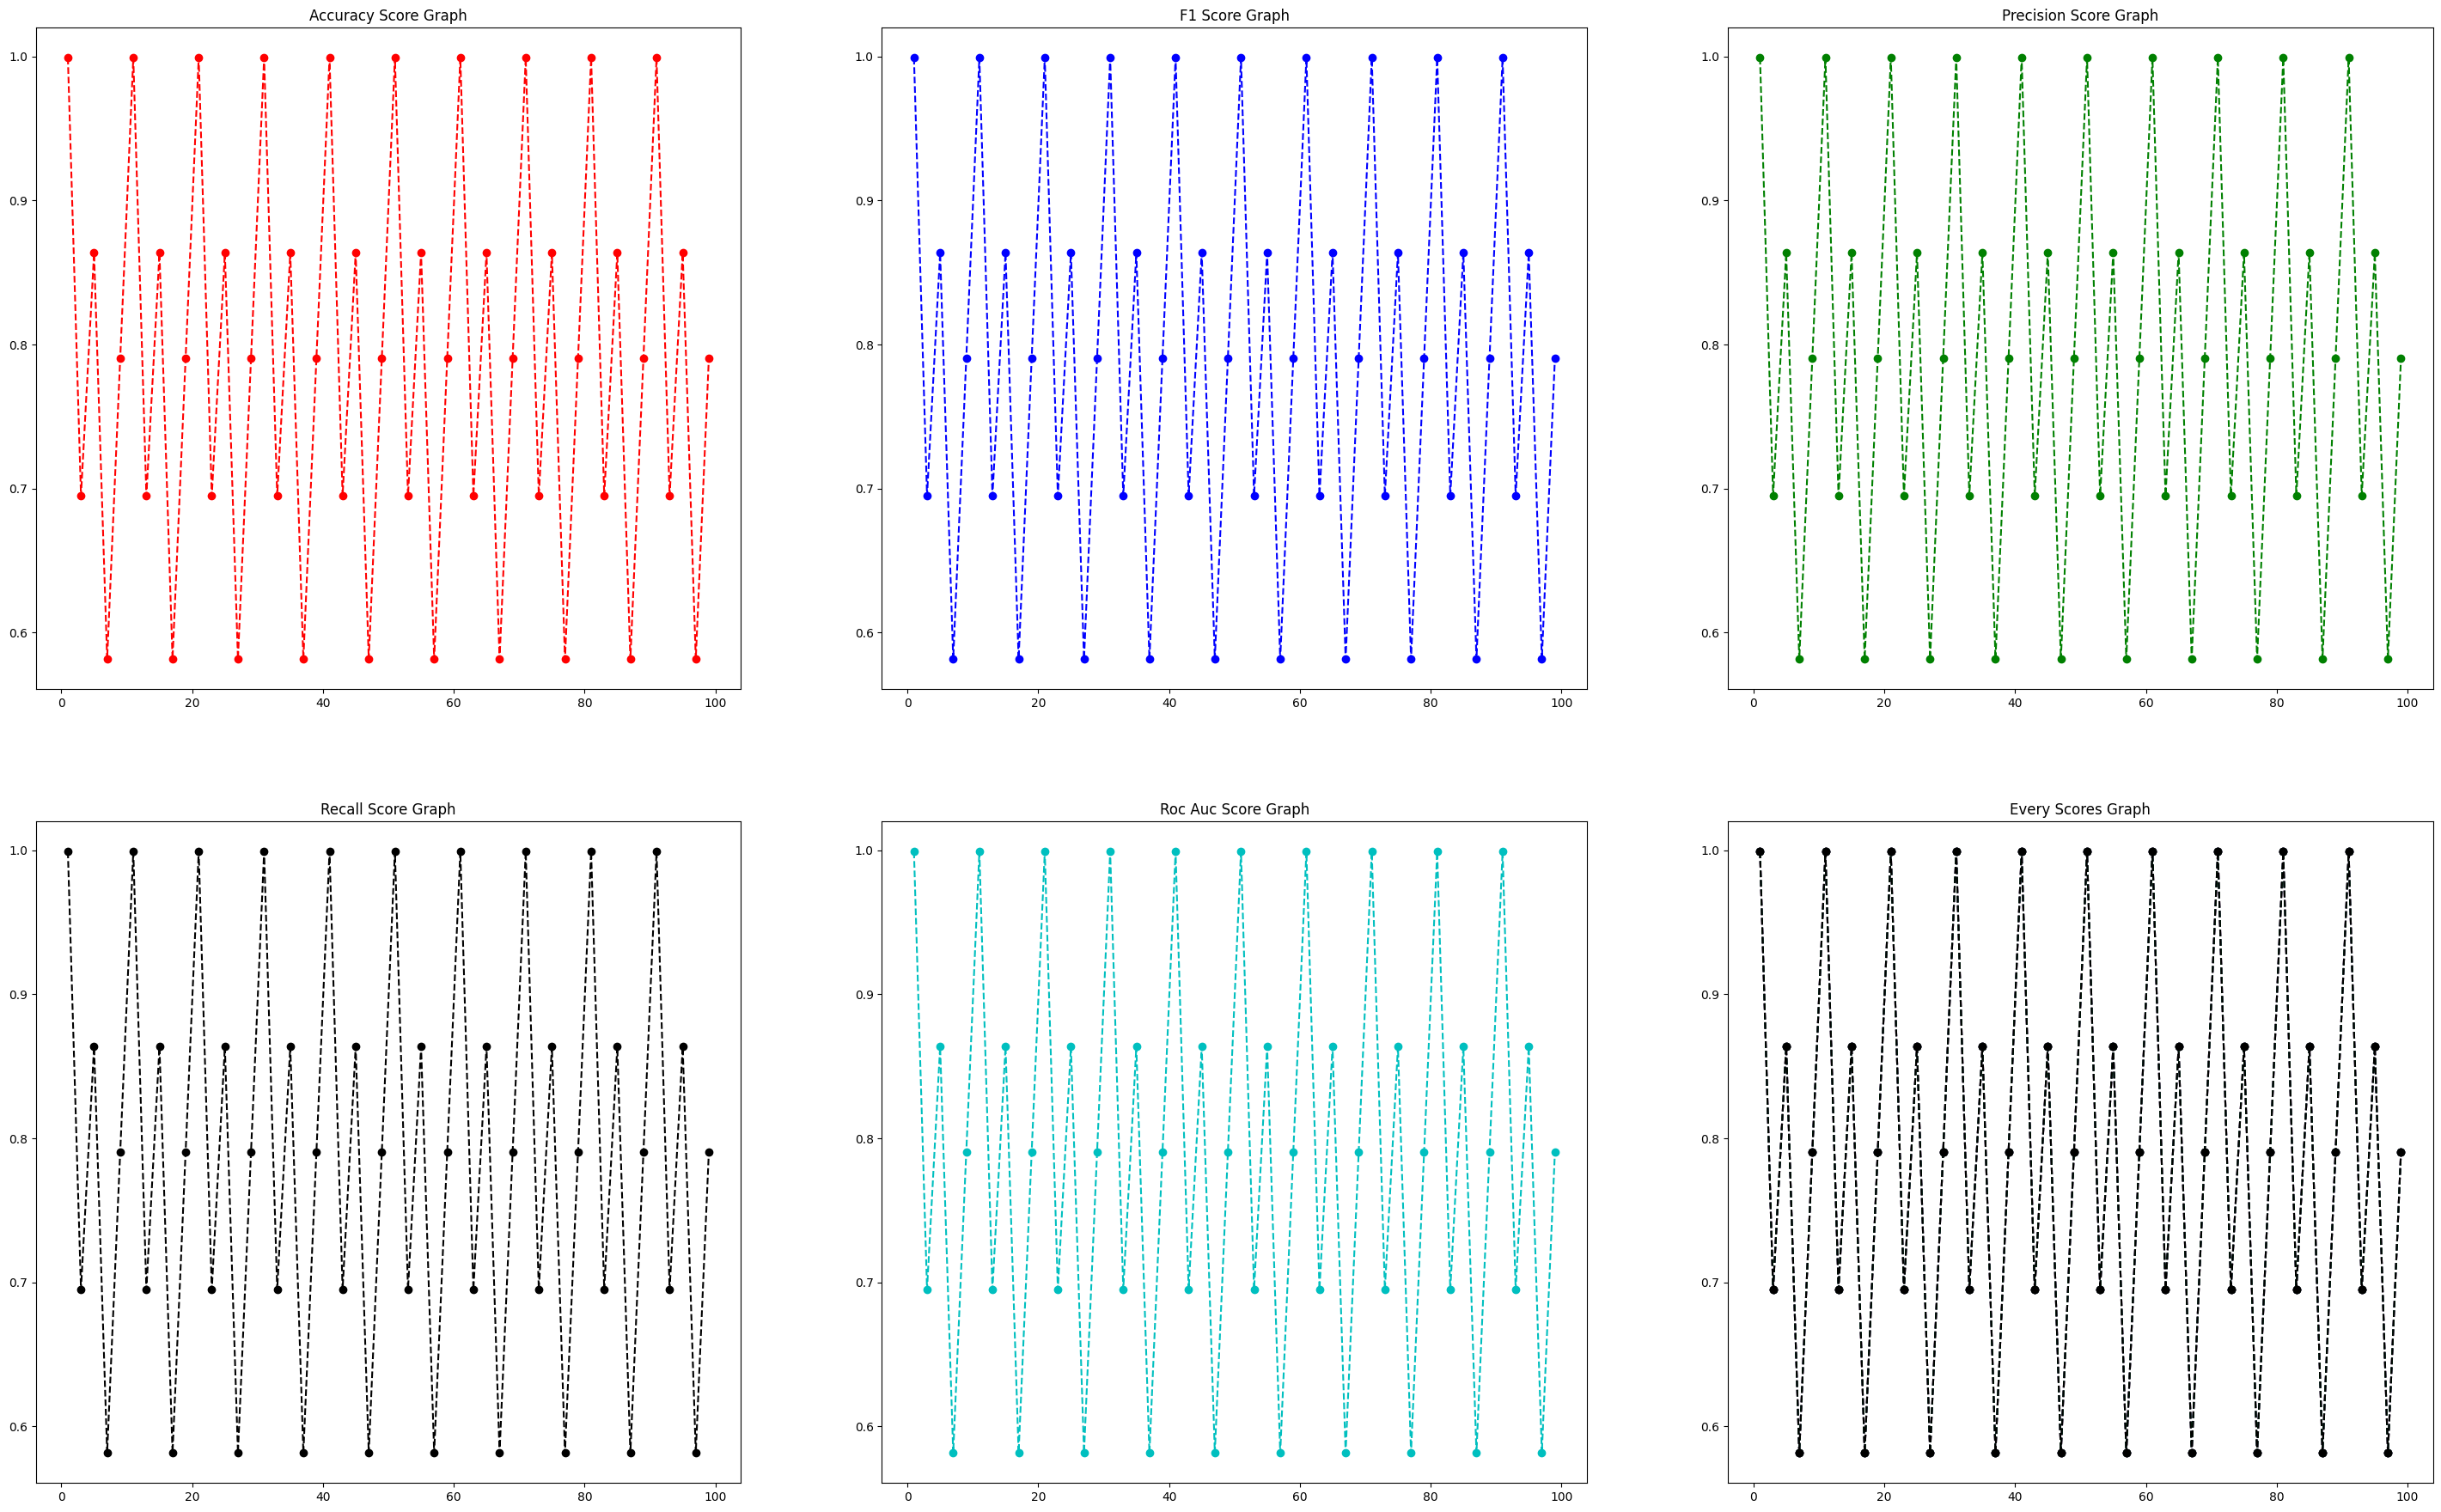

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_logistic_regression_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_logistic_regression_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_logistic_regression_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_logistic_regression_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_logistic_regression_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_logistic_regression_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_logistic_regression_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_logistic_regression_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_logistic_regression_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_logistic_regression_score_with_acc = best_logistic_regression_score.sum(axis=0)
print("Best score sum with accuracy = ", best_logistic_regression_score_with_acc.max()*100)

# Best score sum without accuracy
best_logistic_regression_score_without_acc = np.delete(best_logistic_regression_score, 0, axis = 0)
best_logistic_regression_score_without_acc = best_logistic_regression_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_logistic_regression_score_without_acc.max()*100)

Best score sum with accuracy =  499.56111091604936
Best score sum without accuracy =  399.64888873283945


In [ ]:
# Best score sum with accuracy index number
best_logistic_regression_score_with_acc.argmax()

0

In [ ]:
# Best score sum with accuracy index number
best_logistic_regression_score_without_acc.argmax()

0

Accuracy score of the Logistic Regression model is [99.91222218]
F1 score of the Logistic Regression model is [99.91222218]
Precision score of the Logistic Regression model is [99.91222218]
Recall score of the Logistic Regression model is [99.91222218]
ROC score of the Logistic Regression model is [99.91222218]:


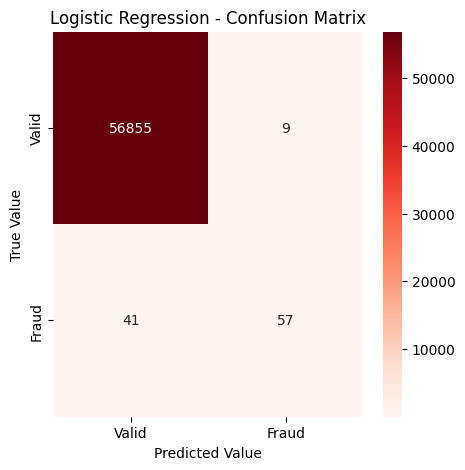

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the Logistic Regression model is {}".format((accuracy_logistic_regression_score[best_logistic_regression_score_with_acc.argmax()]*100)))
print("F1 score of the Logistic Regression model is {}".format(f1_logistic_regression_score[best_logistic_regression_score_with_acc.argmax()]*100))
print("Precision score of the Logistic Regression model is {}".format(precision_logistic_regression_score[best_logistic_regression_score_with_acc.argmax()]*100))
print("Recall score of the Logistic Regression model is {}".format(recall_logistic_regression_score[best_logistic_regression_score_with_acc.argmax()]*100))
print("ROC score of the Logistic Regression model is {}:".format(roc_auc_logistic_regression_score[best_logistic_regression_score_with_acc.argmax()]*100))

# Best learning scores Logistic Regression
logistic_regression_confusion_matrix = logistic_regression_confusion_matrix.reshape(round((ending-beginning)/step_size),4)
logistic_regression_confusion_matrix = logistic_regression_confusion_matrix[best_logistic_regression_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(logistic_regression_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Logistic Regression 
best_acc_score_logistic_regression = best_logistic_regression_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_logistic_regression.argmax()))
print("Best accuracy score hyperparameter C value {}".format(best_acc_score_logistic_regression.argmax()*2+1))
print("Best Accuracy score of the Logistic Regression model {}".format(best_acc_score_logistic_regression[best_acc_score_logistic_regression.argmax()]*100))

Best accuracy score index 0
Best accuracy score hyperparameter C value 1
Best Accuracy score of the Logistic Regression model 99.91222218320986


# Support Vector Machine

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_svm_score = np.array([])
svm_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 1
ending = 101
step_size = 2

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    svm = SVC(C=i, random_state=42) 
    svm.fit(X_train, y_train)
    svm_yhat = svm.predict(X_test)
    best_svm_scores = [accuracy_score(y_test, svm_yhat), f1_score(y_test, svm_yhat), precision_score(y_test, svm_yhat), recall_score(y_test, svm_yhat), roc_auc_score(y_test, svm_yhat)]
    best_svm_score = np.concatenate((best_svm_score, best_svm_scores))
    
    # Every k values stores in a confusion matrix array
    svm_confusion_matrix = np.concatenate((svm_confusion_matrix, confusion_matrix(y_test, svm_yhat, labels = [0, 1]).ravel()))

# confusion matrix, array to matrix
best_svm_score = best_svm_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_svm_score = np.array([best_svm_score[0,:]]).T
f1_svm_score = np.array([best_svm_score[1,:]]).T
precision_svm_score = np.array([best_svm_score[2,:]]).T
recall_svm_score = np.array([best_svm_score[3,:]]).T
roc_auc_svm_score = np.array([best_svm_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

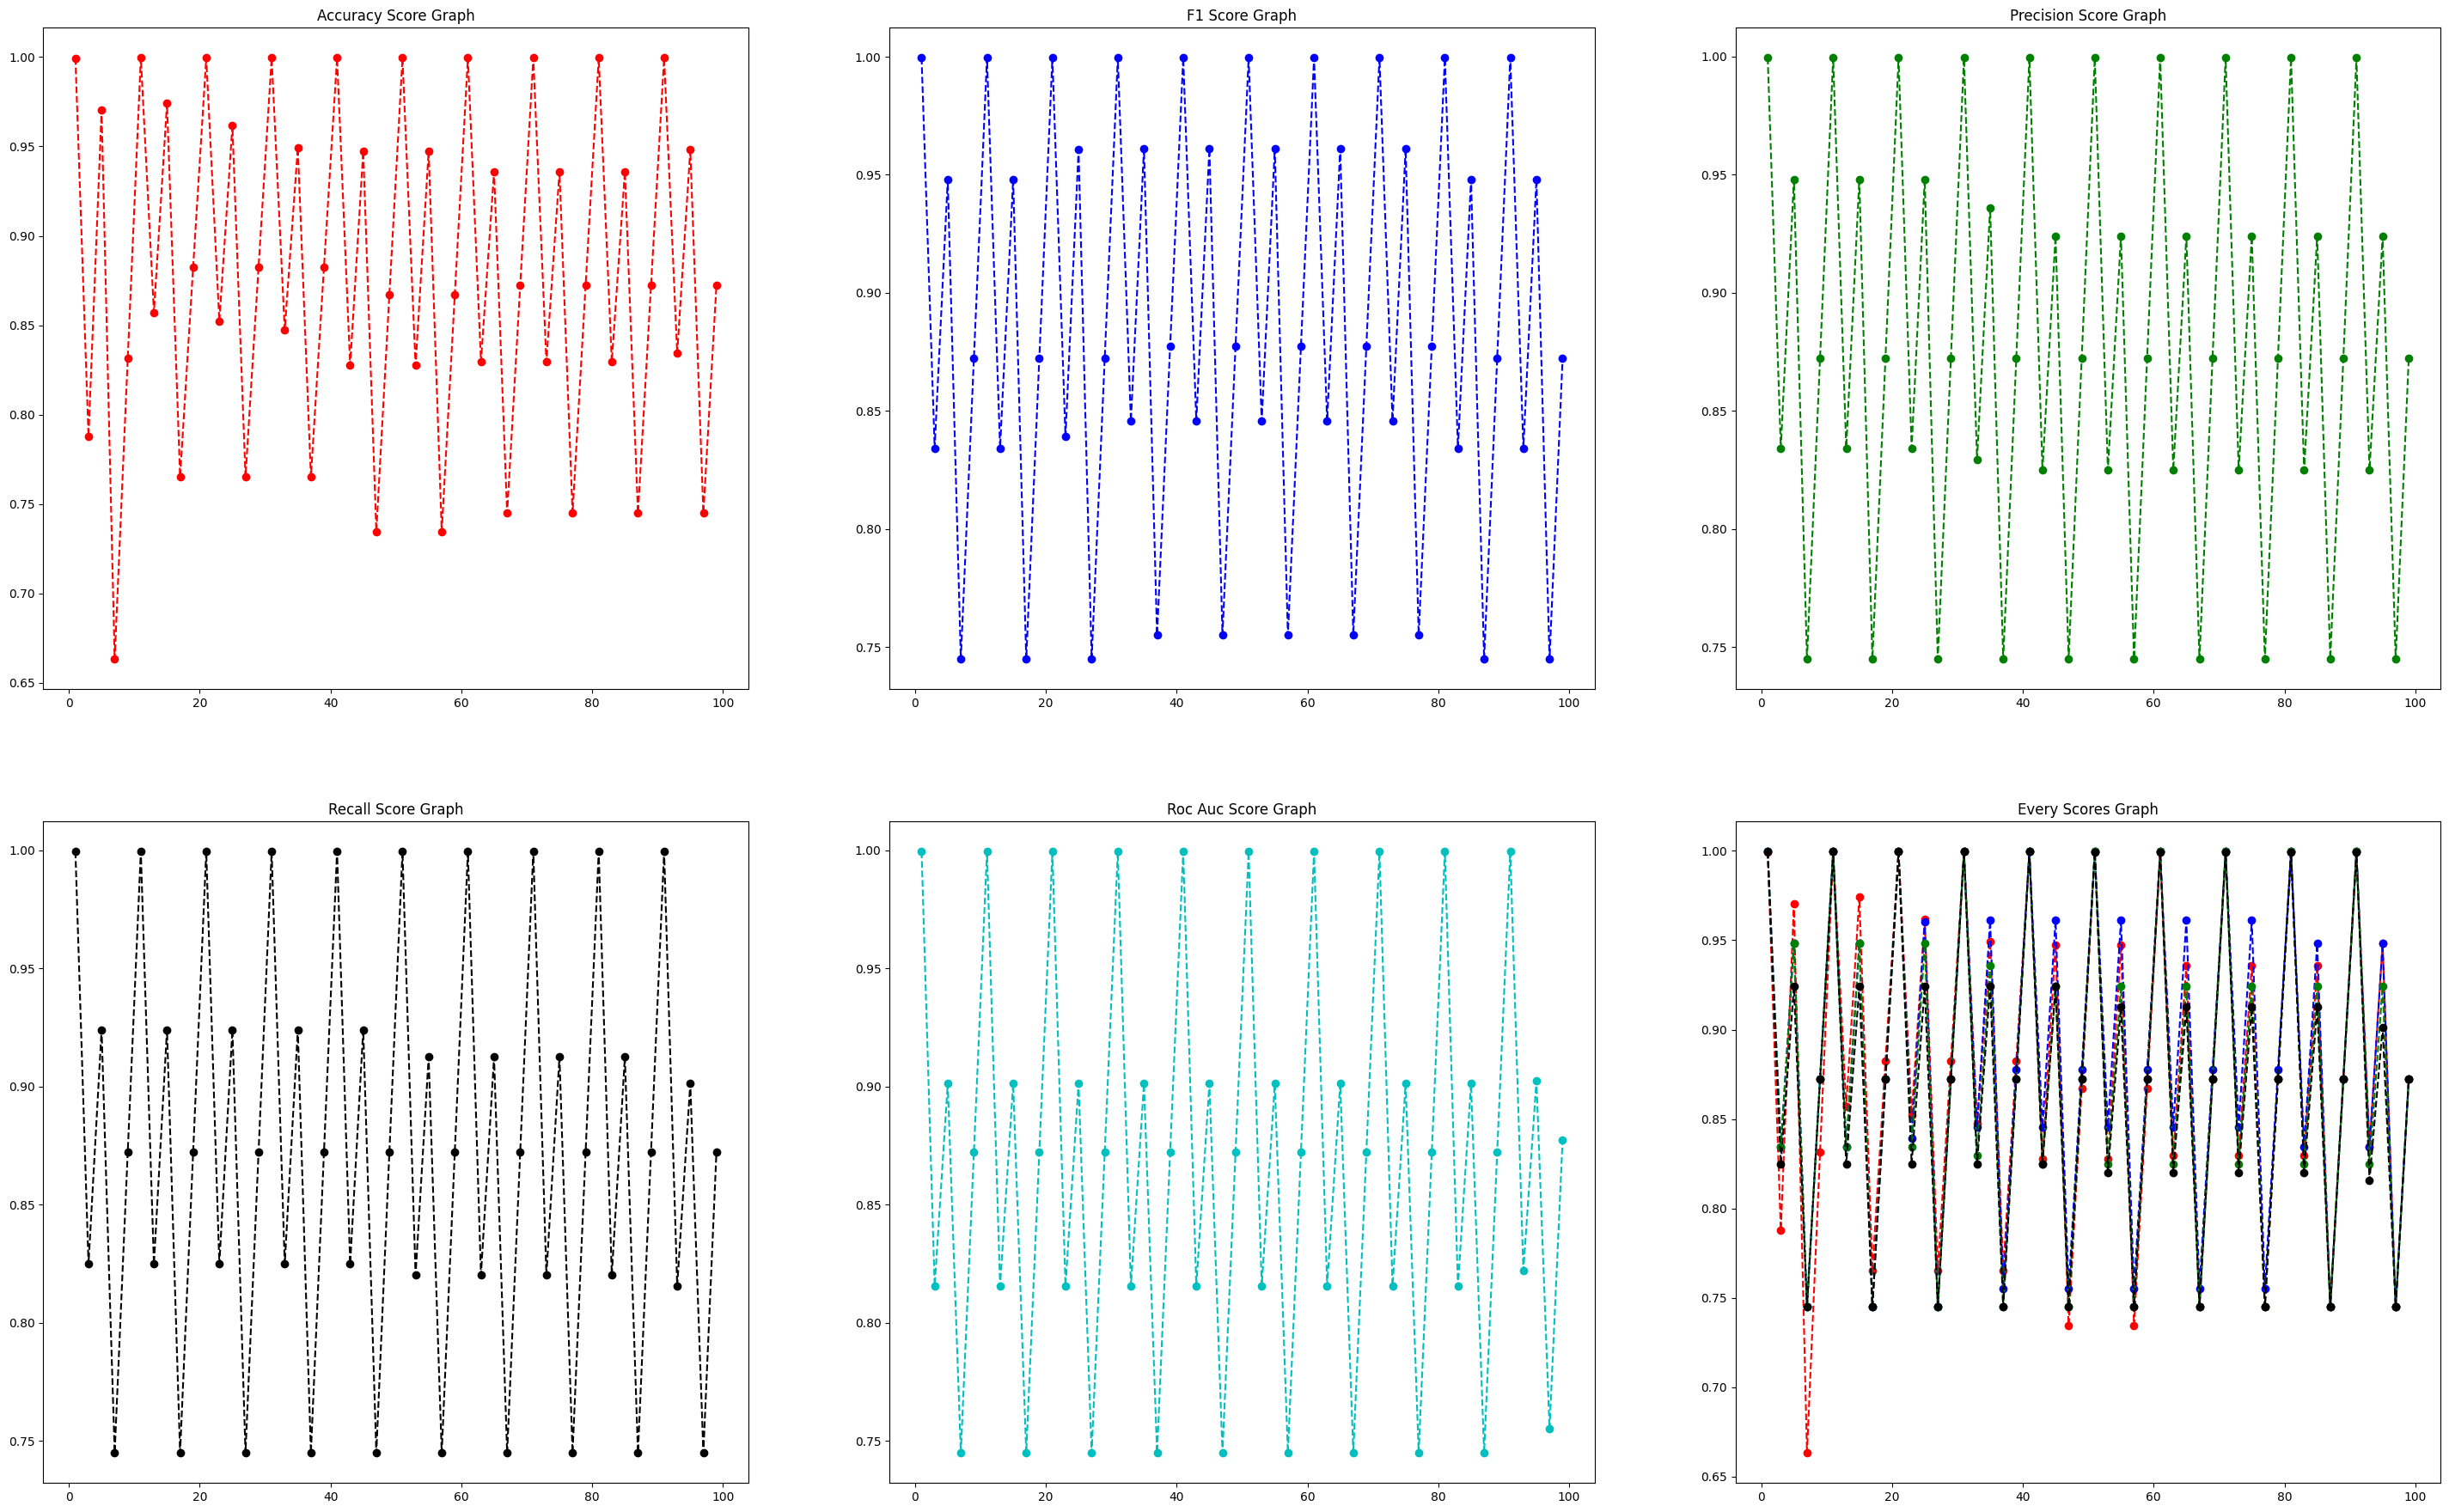

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_svm_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_svm_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_svm_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_svm_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_svm_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_svm_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_svm_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_svm_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_svm_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_svm_score_with_acc = best_svm_score.sum(axis=0)
print("Best score sum with accuracy = ", best_svm_score_with_acc.max()*100)

# Best score sum without accuracy
best_svm_score_without_acc = np.delete(best_svm_score, 0, axis = 0)
best_svm_score_without_acc = best_svm_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_svm_score_without_acc.max()*100)

Best score sum with accuracy =  499.741933218637
Best score sum without accuracy =  399.78757768336783


In [ ]:
# Best score sum with accuracy index number
best_svm_score_with_acc.argmax()

5

In [ ]:
# Best score sum with accuracy index number
best_svm_score_without_acc.argmax()

10

Accuracy score of the Support Vector Machine model is [99.95611109]
F1 score of the Support Vector Machine model is [99.94908887]
Precision score of the Support Vector Machine model is [99.94908887]
Recall score of the Support Vector Machine model is [99.94557775]
ROC score of the Support Vector Machine model is [99.94206664]:


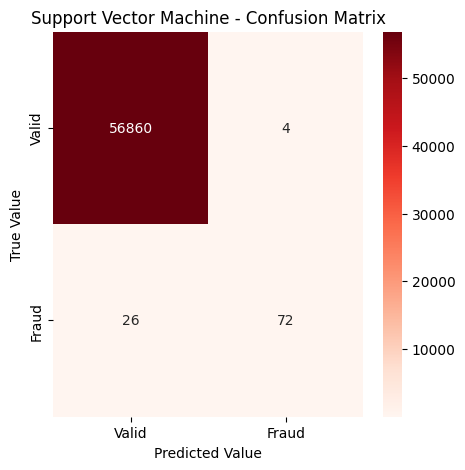

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the Support Vector Machine model is {}".format((accuracy_svm_score[best_svm_score_with_acc.argmax()]*100)))
print("F1 score of the Support Vector Machine model is {}".format(f1_svm_score[best_svm_score_with_acc.argmax()]*100))
print("Precision score of the Support Vector Machine model is {}".format(precision_svm_score[best_svm_score_with_acc.argmax()]*100))
print("Recall score of the Support Vector Machine model is {}".format(recall_svm_score[best_svm_score_with_acc.argmax()]*100))
print("ROC score of the Support Vector Machine model is {}:".format(roc_auc_svm_score[best_svm_score_with_acc.argmax()]*100))

# Best learning scores Support Vector Machine
svm_confusion_matrix = svm_confusion_matrix.reshape(round((ending-beginning)/step_size),4)
svm_confusion_matrix = svm_confusion_matrix[best_svm_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(svm_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Support Vector Machine - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Support Vector Machine
best_acc_score_svm = best_svm_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_svm.argmax()))
print("Best accuracy score hyperparameter C value {}".format(best_acc_score_svm.argmax()*2+1))
print("Best Accuracy score of the Support Vector Machine model {}".format(best_acc_score_svm[best_acc_score_svm.argmax()]*100))

Best accuracy score index 5
Best accuracy score hyperparameter C value 11
Best Accuracy score of the Support Vector Machine model 99.95611109160492


# Gradient Boosting Classifier 

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_gbclr_score = np.array([])
gbc_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 0.004
ending = 0.104
step_size = 0.002

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate = i, random_state=42)
    gbc.fit(X_train, y_train)
    gbc_yhat = gbc.predict(X_test)
    best_gbclr_scores = [accuracy_score(y_test, gbc_yhat), f1_score(y_test, gbc_yhat), precision_score(y_test, gbc_yhat), recall_score(y_test, gbc_yhat), roc_auc_score(y_test, gbc_yhat)]
    best_gbclr_score = np.concatenate((best_gbclr_score, best_gbclr_scores))

    # Every learning_rate values stores in a confusion matrix array
    gbc_confusion_matrix = np.concatenate((gbc_confusion_matrix, confusion_matrix(y_test, gbc_yhat, labels = [0, 1]).ravel()))
# confusion matrix, array to matrix
best_gbclr_score = best_gbclr_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_gbc_score = np.array([best_gbclr_score[0,:]]).T
f1_gbc_score = np.array([best_gbclr_score[1,:]]).T
precision_gbc_score = np.array([best_gbclr_score[2,:]]).T
recall_gbc_score = np.array([best_gbclr_score[3,:]]).T
roc_auc_gbc_score = np.array([best_gbclr_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

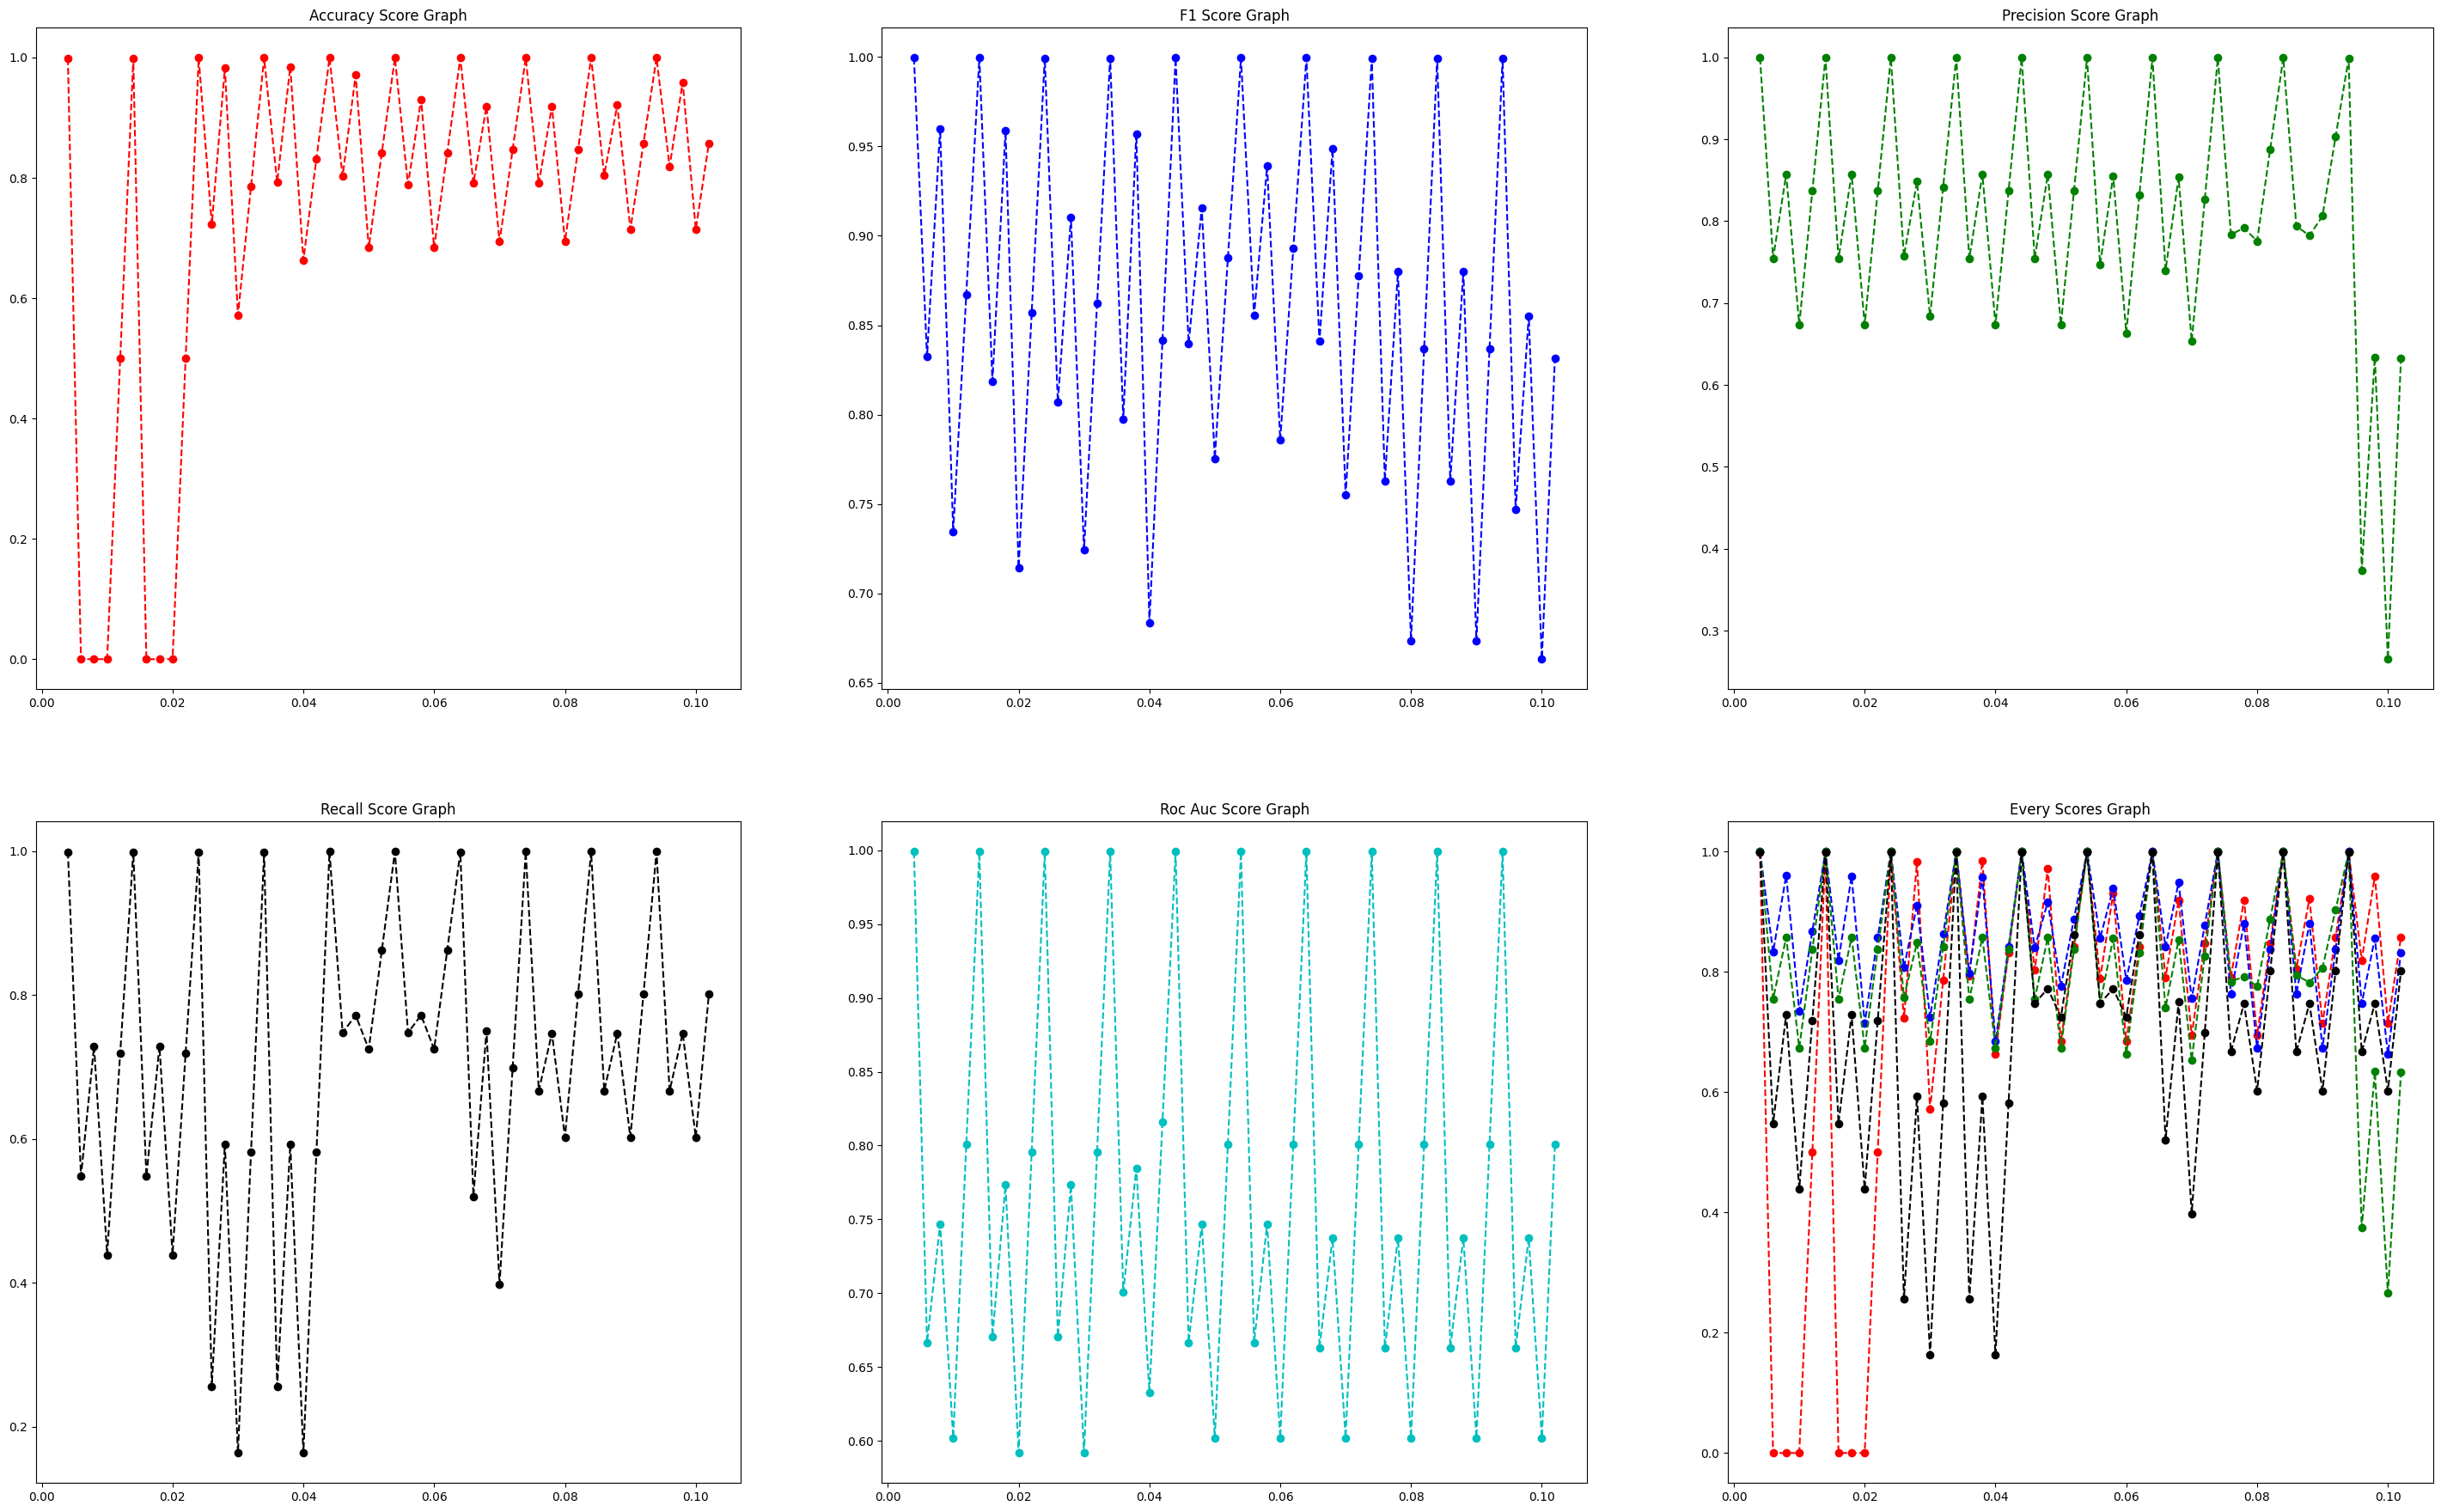

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_gbc_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_gbc_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_gbc_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_gbc_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_gbc_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_gbc_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_gbc_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_gbc_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_gbc_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_gbclr_score_with_acc = best_gbclr_score.sum(axis=0)
print("Best score sum with accuracy = ", best_gbclr_score_with_acc.max()*100)

# Best score sum without accuracy
best_gbclr_score_without_acc = np.delete(best_gbclr_score, 0, axis = 0)
best_gbclr_score_without_acc = best_gbclr_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_gbclr_score_without_acc.max()*100)

Best score sum with accuracy =  499.62782205680975
Best score sum without accuracy =  399.68926652856294


In [ ]:
# Best score sum with accuracy index number
best_gbclr_score_with_acc.argmax()

20

In [ ]:
# Best score sum with accuracy index number
best_gbclr_score_without_acc.argmax()

25

Accuracy score of the GradientBoostingClassifier model is [99.94206664]
F1 score of the GradientBoostingClassifier model is [99.94908887]
Precision score of the GradientBoostingClassifier model is [99.92451108]
Recall score of the GradientBoostingClassifier model is [99.9157333]
ROC score of the GradientBoostingClassifier model is [99.89642218]:


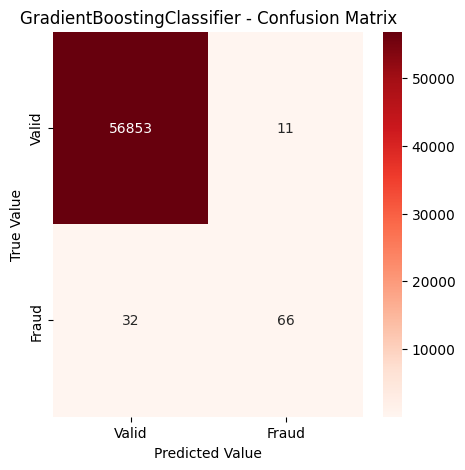

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the GradientBoostingClassifier model is {}".format((accuracy_gbc_score[best_gbclr_score_with_acc.argmax()]*100)))
print("F1 score of the GradientBoostingClassifier model is {}".format(f1_gbc_score[best_gbclr_score_with_acc.argmax()]*100))
print("Precision score of the GradientBoostingClassifier model is {}".format(precision_gbc_score[best_gbclr_score_with_acc.argmax()]*100))
print("Recall score of the GradientBoostingClassifier model is {}".format(recall_gbc_score[best_gbclr_score_with_acc.argmax()]*100))
print("ROC score of the GradientBoostingClassifier model is {}:".format(roc_auc_gbc_score[best_gbclr_score_with_acc.argmax()]*100))

# Best learning scores Gradient Boosting
gbc_confusion_matrix = gbc_confusion_matrix.reshape((round((ending-beginning)/step_size), 4))
gbc_confusion_matrix = gbc_confusion_matrix[best_gbclr_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(gbc_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("GradientBoostingClassifier - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the GradientBoosting
best_acc_score_gbc = best_gbclr_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_gbc.argmax()))
print("Best accuracy score hyperparameter learning_rate {}".format(best_acc_score_gbc.argmax()*0.002+0.004))
print("Best accuracy score of the GradientBoosting model {}".format(best_acc_score_gbc[best_acc_score_gbc.argmax()]*100))

Best accuracy score index 45
Best accuracy score hyperparameter learning_rate 0.094
Best accuracy score of the GradientBoosting model 99.94557775359011


# XGBoost Classifier

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_xgblr_score = np.array([])
xgb_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 0.004
ending = 0.104
step_size = 0.002

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    xgb = XGBClassifier(n_estimators=100, learning_rate = i, random_state=42)
    xgb.fit(X_train, y_train)
    xgb_yhat = xgb.predict(X_test)
    best_xgblr_scores = [accuracy_score(y_test, xgb_yhat), f1_score(y_test, xgb_yhat), precision_score(y_test, xgb_yhat), recall_score(y_test, xgb_yhat), roc_auc_score(y_test, xgb_yhat)]
    best_xgblr_score = np.concatenate((best_xgblr_score, best_xgblr_scores))

    # Every learning_rate values stores in a confusion matrix array
    xgb_confusion_matrix = np.concatenate((xgb_confusion_matrix, confusion_matrix(y_test, xgb_yhat, labels = [0, 1]).ravel()))
# confusion matrix, array to matrix
best_xgblr_score = best_xgblr_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_xgb_score = np.array([best_xgblr_score[0,:]]).T
f1_xgb_score = np.array([best_xgblr_score[1,:]]).T
precision_xgb_score = np.array([best_xgblr_score[2,:]]).T
recall_xgb_score = np.array([best_xgblr_score[3,:]]).T
roc_auc_xgb_score = np.array([best_xgblr_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

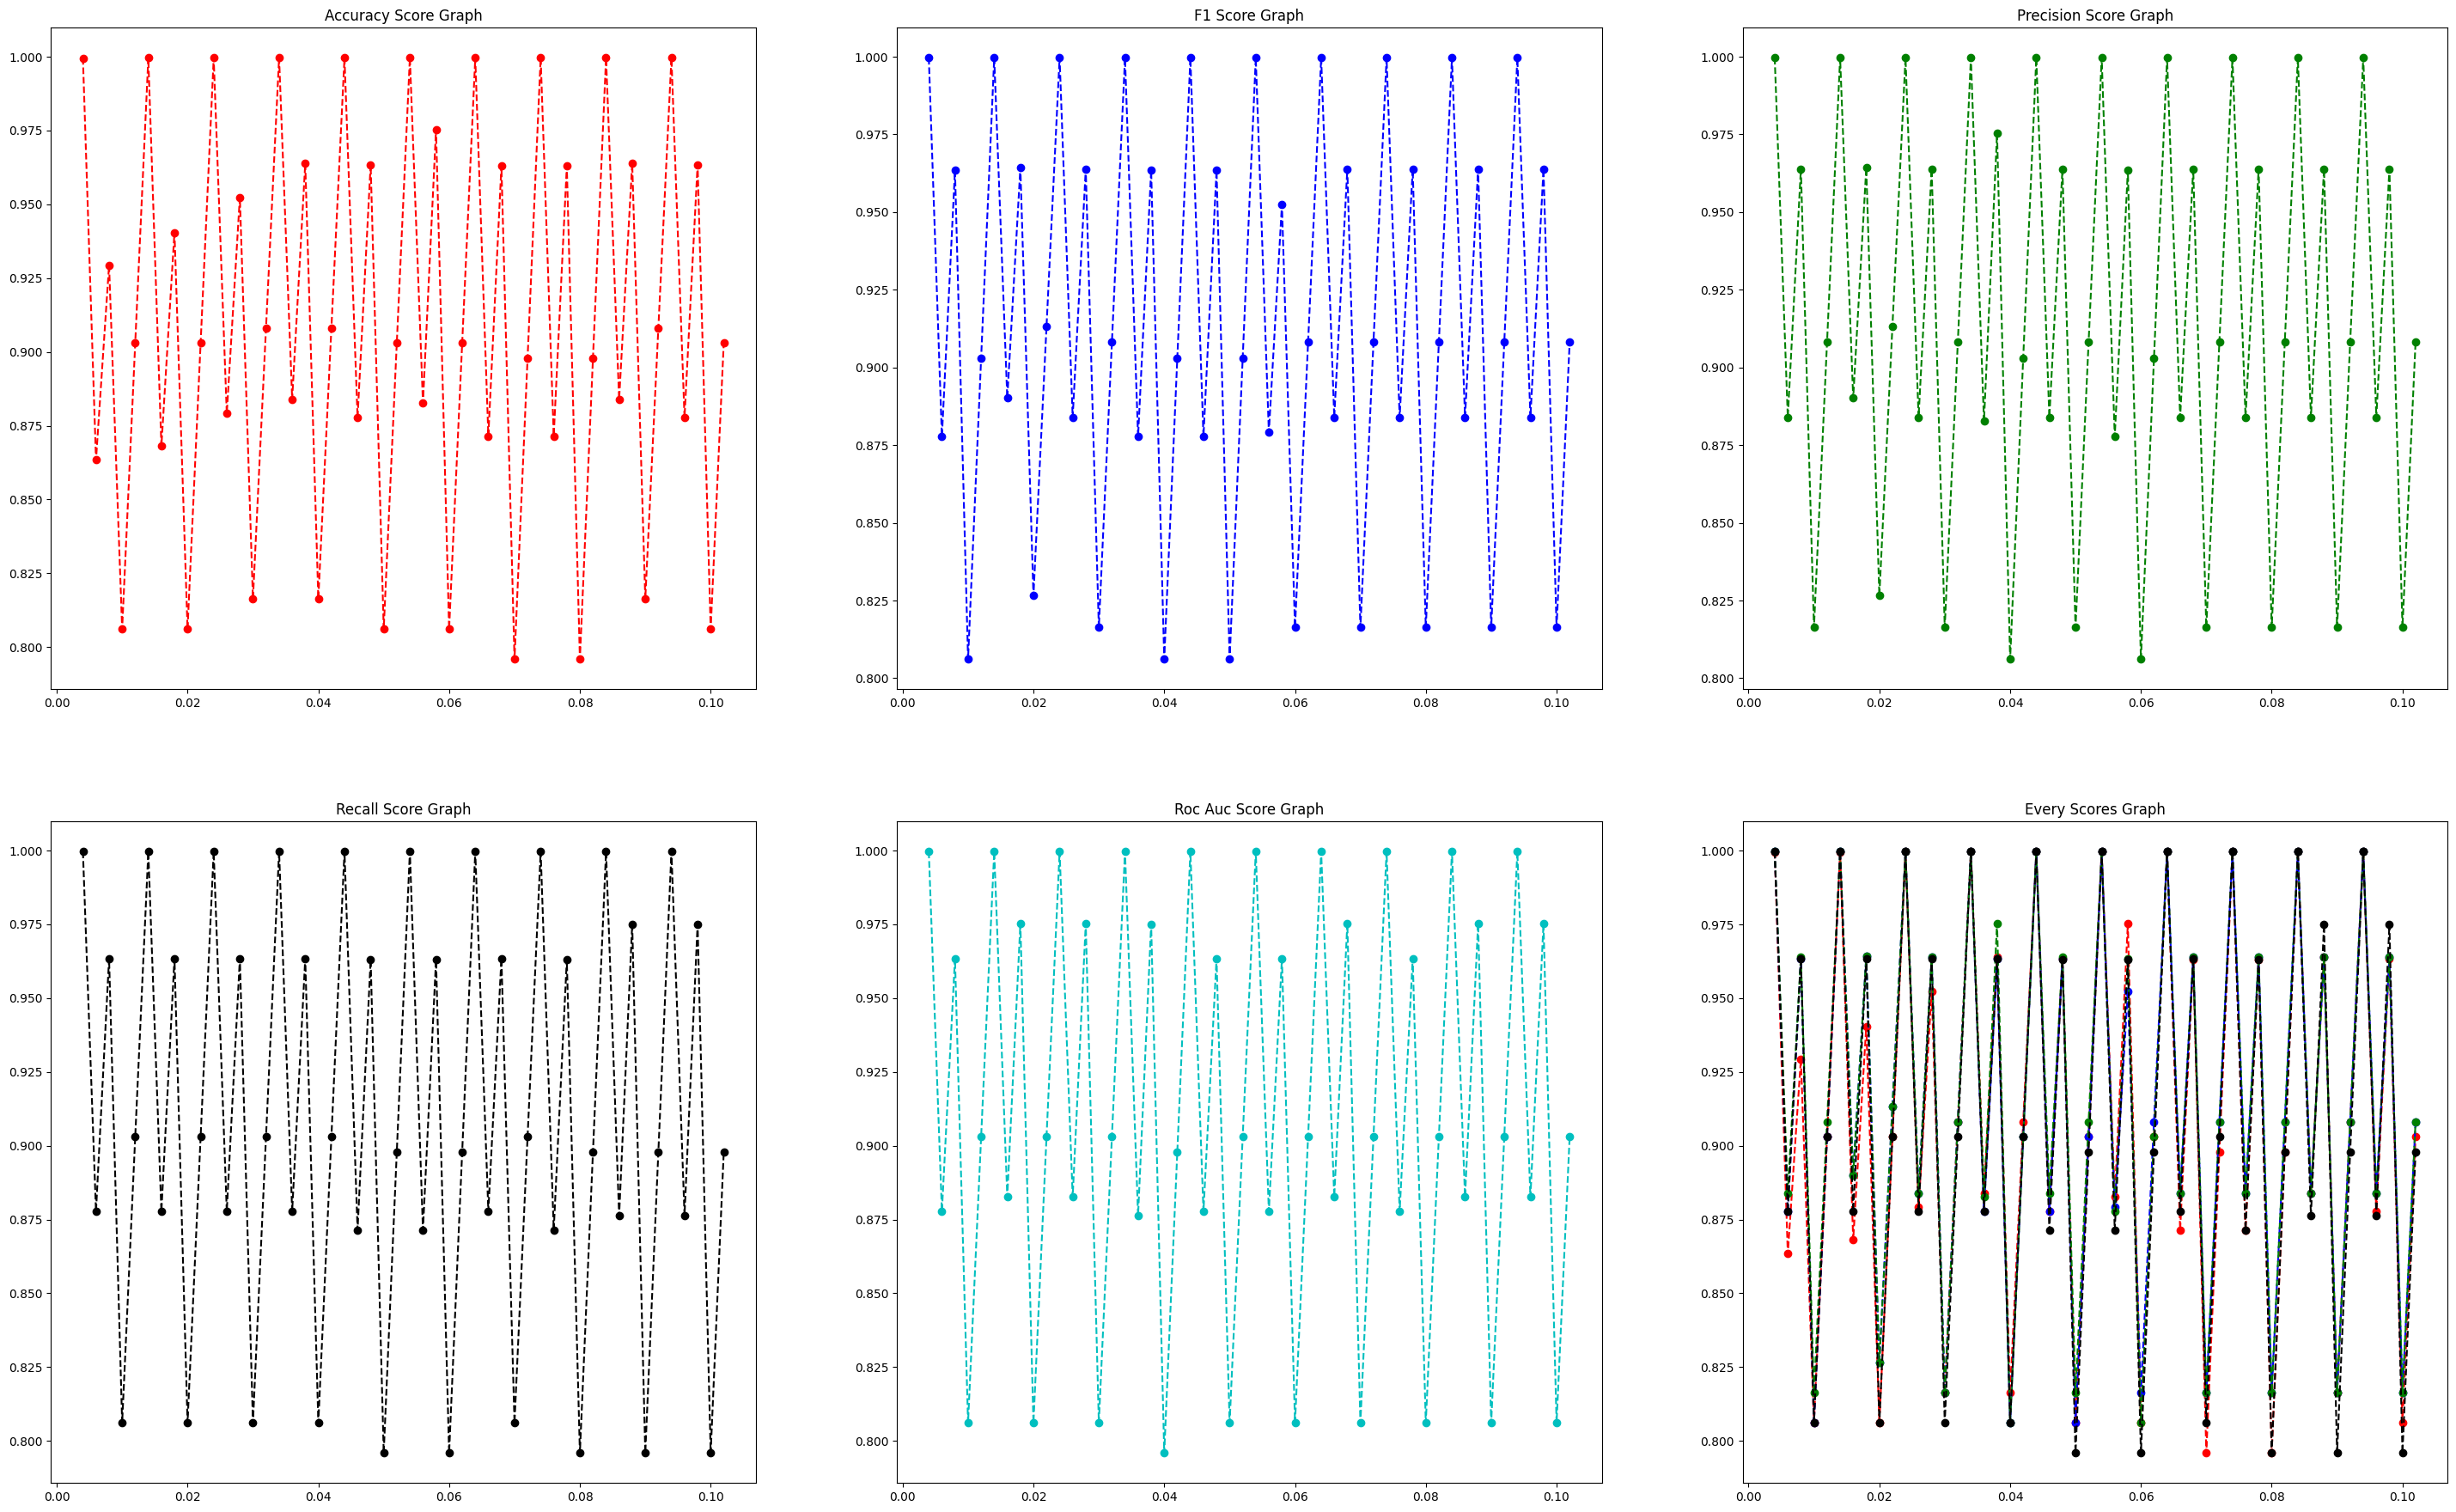

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_xgb_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_xgb_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_xgb_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_xgb_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_xgb_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_xgb_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_xgb_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_xgb_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_xgb_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_xgblr_score_with_acc = best_xgblr_score.sum(axis=0)
print("Best score sum with accuracy = ", best_xgblr_score_with_acc.max()*100)

# Best score sum without accuracy
best_xgblr_score_without_acc = np.delete(best_xgblr_score, 0, axis = 0)
best_xgblr_score_without_acc = best_xgblr_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_xgblr_score_without_acc.max()*100)

Best score sum with accuracy =  499.81391102840485
Best score sum without accuracy =  399.8542888241284


In [ ]:
# Best score sum with accuracy index number
best_xgblr_score_with_acc.argmax()

40

In [ ]:
# Best score sum without accuracy index number
best_xgblr_score_without_acc.argmax()

5

Accuracy score of the XGBoost model is [99.96313332]
F1 score of the XGBoost model is [99.96313332]
Precision score of the XGBoost model is [99.96313332]
Recall score of the XGBoost model is [99.96137776]
ROC score of the XGBoost model is [99.96313332]:


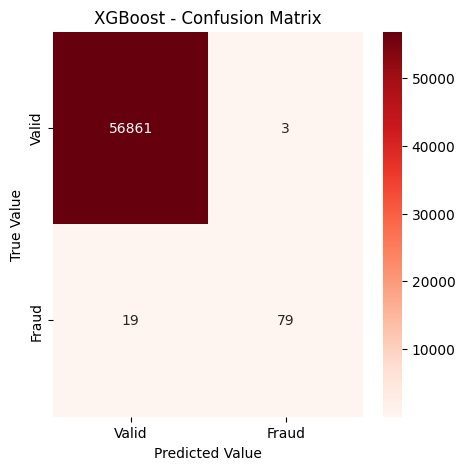

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the XGBoost model is {}".format((accuracy_xgb_score[best_xgblr_score_with_acc.argmax()]*100)))
print("F1 score of the XGBoost model is {}".format(f1_xgb_score[best_xgblr_score_with_acc.argmax()]*100))
print("Precision score of the XGBoost model is {}".format(precision_xgb_score[best_xgblr_score_with_acc.argmax()]*100))
print("Recall score of the XGBoost model is {}".format(recall_xgb_score[best_xgblr_score_with_acc.argmax()]*100))
print("ROC score of the XGBoost model is {}:".format(roc_auc_xgb_score[best_xgblr_score_with_acc.argmax()]*100))

# Best learning scores XGBoost
xgb_confusion_matrix = xgb_confusion_matrix.reshape((round((ending-beginning)/step_size), 4))
xgb_confusion_matrix = xgb_confusion_matrix[best_xgblr_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(xgb_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("XGBoost - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the XGBoost
best_acc_score_xgb = best_xgblr_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_xgb.argmax()))
print("Best accuracy score hyperparameter learning_rate {}".format(best_acc_score_xgb.argmax()*0.004+0.002))
print("Best accuracy score of the XGBoost model {}".format(best_acc_score_xgb[best_acc_score_xgb.argmax()]*100))

Best accuracy score index 15
Best accuracy score hyperparameter learning_rate 0.062
Best accuracy score of the XGBoost model 99.96313331694815


# AdaBoost Classifier

In [ ]:
# Creating empty array for store scores every different learning scores for different hyperparameters 
best_AdaBlr_score = np.array([])
AdaB_confusion_matrix = np.array([])
# Creating different hyperparameter values 
beginning = 0.004
ending = 0.104
step_size = 0.002

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
np.arange(beginning, ending, step_size).shape

(50,)

In [ ]:
# Checking the algorithm will how many times work different hyperparameter values 
round((ending-beginning)/step_size)

50

In [ ]:
# That loop learns and stores every learning score 
for i in np.arange(beginning, ending, step_size):
    # SAMME.R for imbalanced data set
    AdaB = AdaBoostClassifier(algorithm='SAMME.R', n_estimators = 100, learning_rate = i, random_state=42)
    AdaB.fit(X_train, y_train)
    AdaB_yhat = AdaB.predict(X_test)
    best_AdaBlr_scores = [accuracy_score(y_test, AdaB_yhat), f1_score(y_test, AdaB_yhat), precision_score(y_test, AdaB_yhat), recall_score(y_test, AdaB_yhat), roc_auc_score(y_test, AdaB_yhat)]
    best_AdaBlr_score = np.concatenate((best_AdaBlr_score, best_AdaBlr_scores))
    # Every learning_rate values stores in a confusion matrix array
    AdaB_confusion_matrix = np.concatenate((AdaB_confusion_matrix, confusion_matrix(y_test, AdaB_yhat, labels = [0, 1]).ravel()))
# confusion matrix, array to matrix
best_AdaBlr_score = best_AdaBlr_score.reshape(5, round((ending-beginning)/step_size))

# Every scores seperating each of them
accuracy_AdaB_score = np.array([best_AdaBlr_score[0,:]]).T
f1_AdaB_score = np.array([best_AdaBlr_score[1,:]]).T
precision_AdaB_score = np.array([best_AdaBlr_score[2,:]]).T
recall_AdaB_score = np.array([best_AdaBlr_score[3,:]]).T
roc_auc_AdaB_score = np.array([best_AdaBlr_score[4,:]]).T

Text(0.5, 1.0, 'Every Scores Graph')

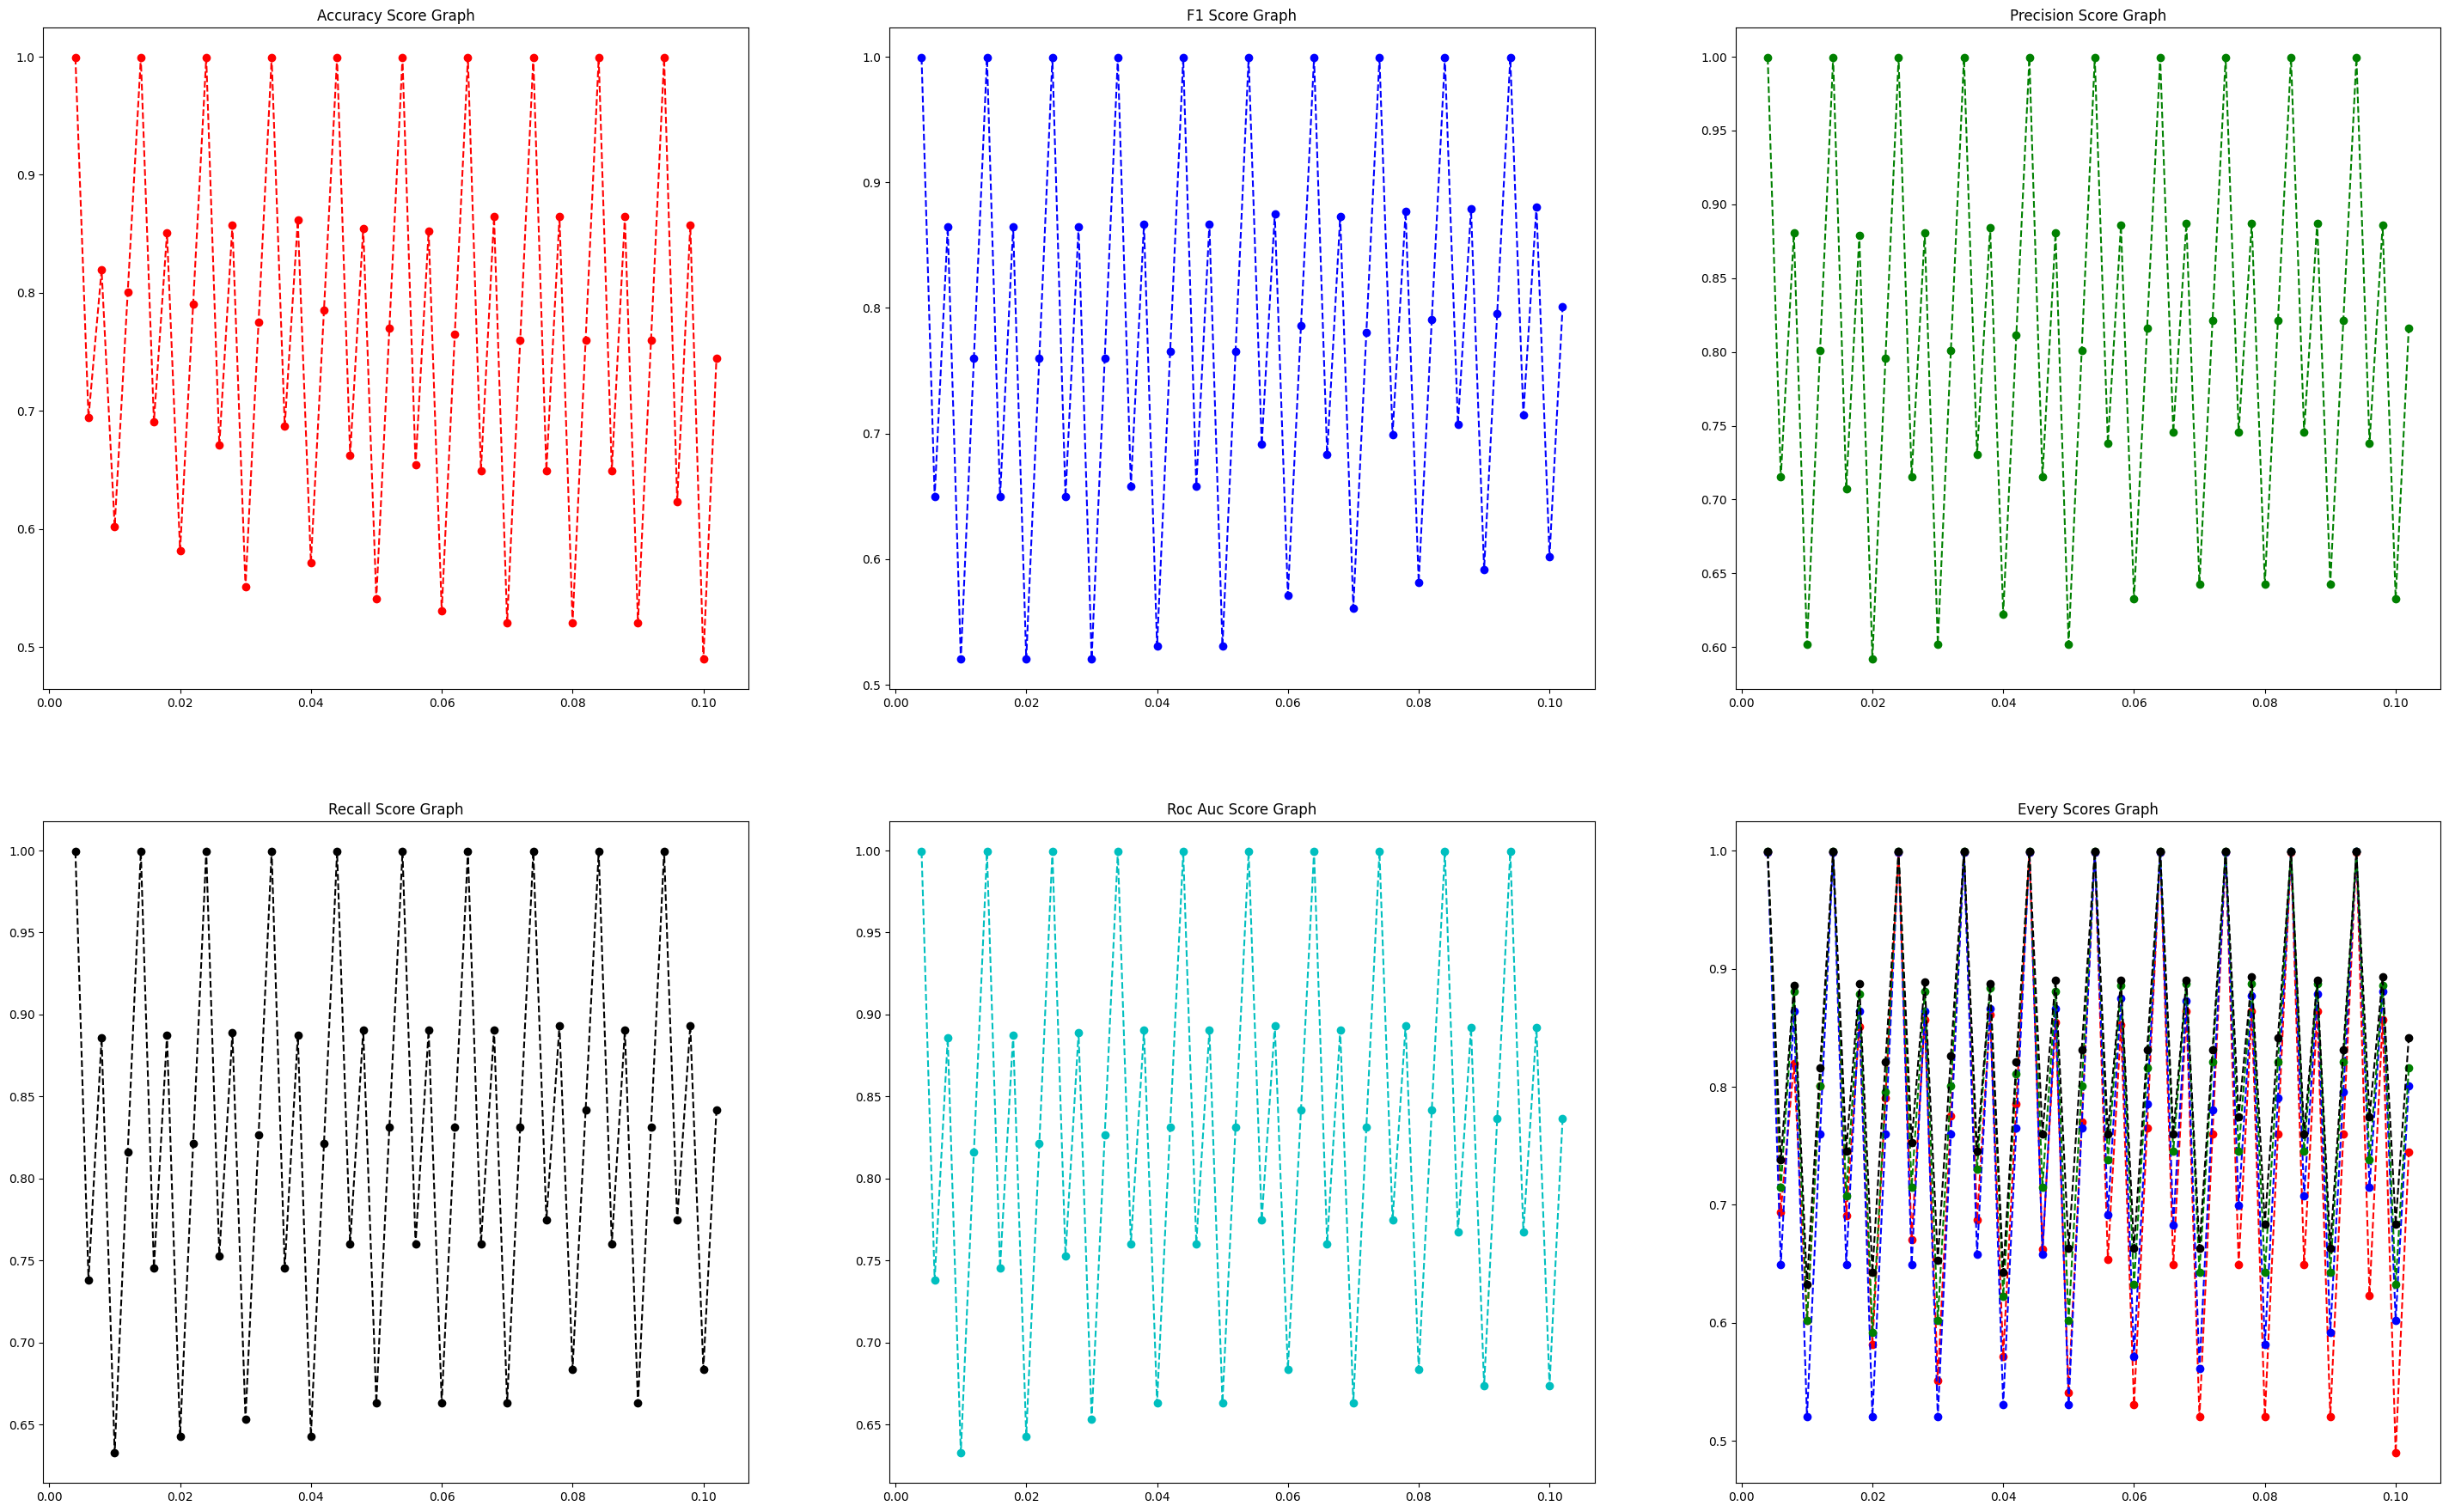

In [ ]:
figure, axis = plt.subplots(2, 3)

figure.set_figheight(22)
figure.set_figwidth(36)

# Accuracy Score
axis[0, 0].plot(np.arange(beginning, ending, step_size), accuracy_AdaB_score, color = "r", marker="o", linestyle="dashed")
axis[0, 0].set_title("Accuracy Score Graph")
  
# F1 Score
axis[0, 1].plot(np.arange(beginning, ending, step_size), f1_AdaB_score, color = "b", marker="o", linestyle="dashed")
axis[0, 1].set_title("F1 Score Graph")
  
# Precision Score
axis[0, 2].plot(np.arange(beginning, ending, step_size), precision_AdaB_score, color = "g", marker="o", linestyle="dashed")
axis[0, 2].set_title("Precision Score Graph")
  
# Recall Score
axis[1, 0].plot(np.arange(beginning, ending, step_size), recall_AdaB_score, color = "k", marker="o", linestyle="dashed")
axis[1, 0].set_title("Recall Score Graph")

# Roc Auc Score
axis[1, 1].plot(np.arange(beginning, ending, step_size), roc_auc_AdaB_score, color = "c", marker="o", linestyle="dashed")
axis[1, 1].set_title("Roc Auc Score Graph")

# All Scores 
axis[1, 2].plot(np.arange(beginning, ending, step_size), accuracy_AdaB_score, color = "r", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), f1_AdaB_score, color = "b", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), precision_AdaB_score, color = "g", marker="o", linestyle="dashed")
axis[1, 2].plot(np.arange(beginning, ending, step_size), recall_AdaB_score, color = "k", marker="o", linestyle="dashed")
axis[1, 2].set_title("Every Scores Graph")

In [ ]:
# Best score sum with accuracy
best_AdaBlr_score_with_acc = best_AdaBlr_score.sum(axis=0)
print("Best score sum with accuracy = ", best_AdaBlr_score_with_acc.max()*100)

# Best score sum without accuracy
best_AdaBlr_score_without_acc = np.delete(best_AdaBlr_score, 0, axis = 0)
best_AdaBlr_score_without_acc = best_AdaBlr_score_without_acc.sum(axis=0)
print("Best score sum without accuracy = ", best_AdaBlr_score_without_acc.max()*100)

Best score sum with accuracy =  499.60499982444435
Best score sum without accuracy =  399.70155542291354


In [ ]:
# Best score sum with accuracy index number
best_AdaBlr_score_with_acc.argmax()

35

In [ ]:
# Best score sum without accuracy index number
best_AdaBlr_score_without_acc.argmax()

35

Accuracy score of the AdaBoost model is [99.9034444]
F1 score of the AdaBoost model is [99.91397774]
Precision score of the AdaBoost model is [99.92451108]
Recall score of the AdaBoost model is [99.9315333]
ROC score of the AdaBoost model is [99.9315333]:


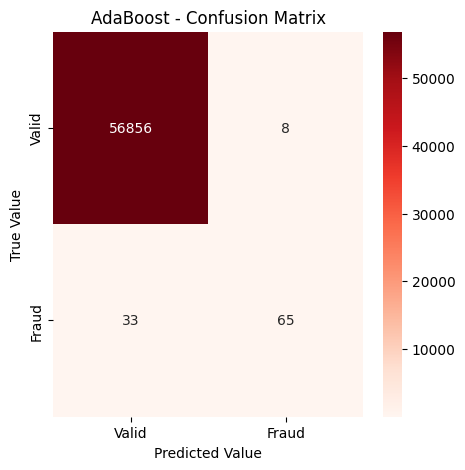

In [ ]:
# Best learning scores, sum with accuracy 
print("Accuracy score of the AdaBoost model is {}".format((accuracy_AdaB_score[best_AdaBlr_score_with_acc.argmax()]*100)))
print("F1 score of the AdaBoost model is {}".format(f1_AdaB_score[best_AdaBlr_score_with_acc.argmax()]*100))
print("Precision score of the AdaBoost model is {}".format(precision_AdaB_score[best_AdaBlr_score_with_acc.argmax()]*100))
print("Recall score of the AdaBoost model is {}".format(recall_AdaB_score[best_AdaBlr_score_with_acc.argmax()]*100))
print("ROC score of the AdaBoost model is {}:".format(roc_auc_AdaB_score[best_AdaBlr_score_with_acc.argmax()]*100))

# Best learning scores AdaBoost
AdaB_confusion_matrix = AdaB_confusion_matrix.reshape((round((ending-beginning)/step_size), 4))
AdaB_confusion_matrix = AdaB_confusion_matrix[best_AdaBlr_score_with_acc.argmax(), :].reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(AdaB_confusion_matrix), 
            annot=True, fmt=".0f", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("AdaBoost - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the AdaBoost
best_acc_score_AdaB = best_AdaBlr_score[0,:]
print("Best accuracy score index {}".format(best_acc_score_AdaB.argmax()))
print("Best accuracy score hyperparameter learning_rate {}".format(best_acc_score_AdaB.argmax()*0.002+0.004))
print("Best accuracy score of the AdaBoost model {}".format(best_acc_score_AdaB[best_acc_score_AdaB.argmax()]*100))

Best accuracy score index 5
Best accuracy score hyperparameter learning_rate 0.014
Best accuracy score of the AdaBoost model 99.91046662687407


# Isolation Forest

In [ ]:
isolation_forest = IsolationForest(random_state = 42)
isolation_forest.fit(X)
isolation_forest_yhat = isolation_forest.predict(X)

In [ ]:
# Valid transactions are labelled 0, but change it valid = 1 
isolation_forest_yhat[isolation_forest_yhat ==  1] = 0     
isolation_forest_yhat[isolation_forest_yhat == -1] = 1 

# Total number of errors 
errors = (isolation_forest_yhat != y).sum()                  

print('The errors of the Isolation Forest model is ', errors)

The errors of the Isolation Forest model is  10963


Accuracy score of the Isolation Forest model is 96.1507
F1 score of the Isolation Forest model is 6.896
Precision score of the Isolation Forest model is 82.5203
Recall score of the Isolation Forest model is 3.5983
ROC score of the Isolation Forest model is 51.7834:


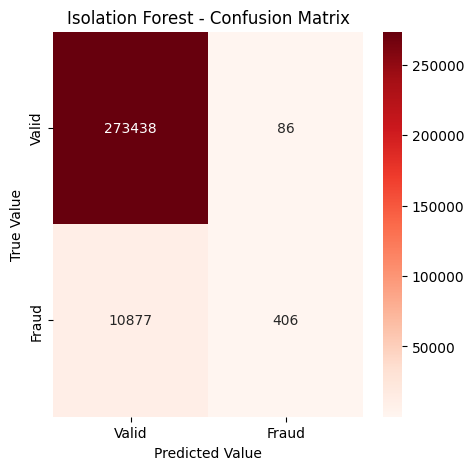

In [ ]:
# Best learning scores 
print("Accuracy score of the Isolation Forest model is {}".format(round(accuracy_score(isolation_forest_yhat, y)*100,4)))
print("F1 score of the Isolation Forest model is {}".format(round(f1_score(isolation_forest_yhat, y)*100,4))) 
print("Precision score of the Isolation Forest model is {}".format(round(precision_score(isolation_forest_yhat, y)*100,4)))
print("Recall score of the Isolation Forest model is {}".format(round(recall_score(isolation_forest_yhat, y)*100,4)))
print("ROC score of the Isolation Forest model is {}:".format(round(roc_auc_score(isolation_forest_yhat, y)*100,4)))

isolation_forest_confusion_matrix = confusion_matrix(isolation_forest_yhat, y, labels = [0, 1])

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(isolation_forest_confusion_matrix), 
            annot=True, fmt="d", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Isolation Forest - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Isolation Forest
print("Best Accuracy score of the Isolation Forest model {}".format(accuracy_score(isolation_forest_yhat, y)*100))

Best Accuracy score of the Isolation Forest model 96.15072663242125


# Bernoulli Naive Bayes 

In [27]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
BNB_yhat = BNB.predict(X_test)

Accuracy score of the Bernoulli Naive Bayes model is 99.9105
F1 score of the Bernoulli Naive Bayes model is 70.8571
Precision score of the Bernoulli Naive Bayes model is 80.5195
Recall score of the Bernoulli Naive Bayes model is 63.2653
ROC score of the Bernoulli Naive Bayes model is 81.6195:


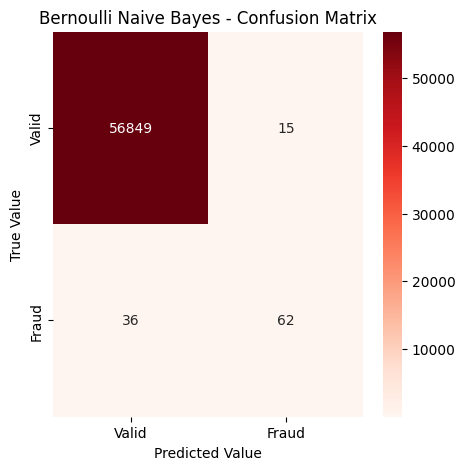

In [28]:
# Best learning scores
print("Accuracy score of the Bernoulli Naive Bayes model is {}".format(round(accuracy_score(y_test, BNB_yhat)*100,4)))
print("F1 score of the Bernoulli Naive Bayes model is {}".format(round(f1_score(y_test, BNB_yhat)*100,4)))
print("Precision score of the Bernoulli Naive Bayes model is {}".format(round(precision_score(y_test, BNB_yhat)*100,4)))
print("Recall score of the Bernoulli Naive Bayes model is {}".format(round(recall_score(y_test, BNB_yhat)*100,4)))
print("ROC score of the Bernoulli Naive Bayes model is {}:".format(round(roc_auc_score(y_test, BNB_yhat)*100,4)))

BNB_confusion_matrix = confusion_matrix(y_test, BNB_yhat, labels = [0, 1])

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(BNB_confusion_matrix), 
            annot=True, fmt="d", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Bernoulli Naive Bayes - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [29]:
# Best accuracy score of the Bernoulli Naive Bayes
print("Best accuracy score of the Bernoulli Naive Bayes model {}".format(accuracy_score(y_test, BNB_yhat)*100))

Best accuracy score of the Bernoulli Naive Bayes model 99.91046662687407


# Gaussian Naive Bayes

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_yhat = GNB.predict(X_test)

Accuracy score of the Gaussian Naive Bayes model is 97.7827
F1 score of the Gaussian Naive Bayes model is 11.2439
Precision score of the Gaussian Naive Bayes model is 6.0377
Recall score of the Gaussian Naive Bayes model is 81.6327
ROC score of the Gaussian Naive Bayes model is 89.7216:


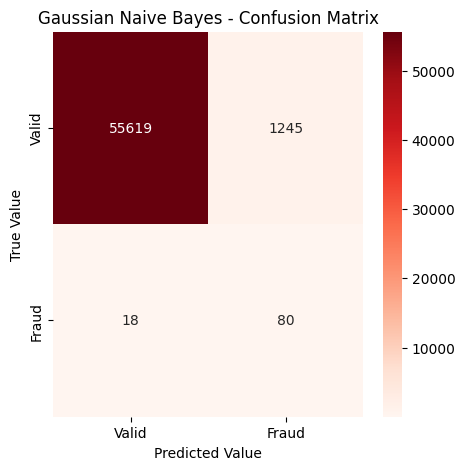

In [ ]:
# Best learning scores
print("Accuracy score of the Gaussian Naive Bayes model is {}".format(round(accuracy_score(y_test, GNB_yhat)*100,4)))
print("F1 score of the Gaussian Naive Bayes model is {}".format(round(f1_score(y_test, GNB_yhat)*100,4)))
print("Precision score of the Gaussian Naive Bayes model is {}".format(round(precision_score(y_test, GNB_yhat)*100,4)))
print("Recall score of the Gaussian Naive Bayes model is {}".format(round(recall_score(y_test, GNB_yhat)*100,4)))
print("ROC score of the Gaussian Naive Bayes model is {}:".format(round(roc_auc_score(y_test, GNB_yhat)*100,4)))

GNB_confusion_matrix = confusion_matrix(y_test, GNB_yhat, labels = [0, 1])

plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(GNB_confusion_matrix), 
            annot=True, fmt="d", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.ylabel("True Value") 
plt.xlabel("Predicted Value") 
plt.show()

In [ ]:
# Best accuracy score of the Gaussian Naive Bayes
print("Best accuracy score of the Gaussian Naive Bayes model {}".format(accuracy_score(y_test, GNB_yhat)*100))

Best accuracy score of the Gaussian Naive Bayes model 97.78273234788104


# Best Accuracy Score List

In [23]:
# The accuracy value that would be obtained if we treated all estimates as normal operations.
normal_transactions_accuracy = 100-fraud_transactions/normal_transactions*100
fraud_transactions_accuracy = fraud_transactions/normal_transactions*100

# Best accuracy scores list
Best_accuracies = [["Decision_Tree", 99.94908886626172, 22], 
                  ["Random_Forest", 99.95962220427653, 32], 
                  ["K_nn", 99.95435553526913, 23], 
                  ["Logistic_Regression", 99.91222218320986, 1], 
                  ["SVM", 99.95611109160492, 11], 
                  ["GradientBoosting", 99.94557775359011, 0.094],
                  ["XGB", 99.96313331694815, 0.062], 
                  ["AdaBoost", 99.91046662687407, 0.014],
                  ["Isolation_Forest", 96.15072663242125, "-"],
                  ["Bernoulli_Naive_Bayes", 99.91046662687407, "-"],
                  ["Gaussian_Naive_Bayes", 97.78273234788104, "-"]]
normal_transactions_accuracy

99.8269524998681

In [24]:
Accuracy_list = pd.DataFrame(Best_accuracies, columns=["Algorithms", "Accuracies", "hyperparameters"])

print(Accuracy_list)

               Algorithms  Accuracies hyperparameters
0           Decision_Tree   99.949089              22
1           Random_Forest   99.959622              32
2                    K_nn   99.954356              23
3     Logistic_Regression   99.912222               1
4                     SVM   99.956111              11
5        GradientBoosting   99.945578           0.094
6                     XGB   99.963133           0.062
7                AdaBoost   99.910467           0.014
8        Isolation_Forest   96.150727               -
9   Bernoulli_Naive_Bayes   99.910467               -
10   Gaussian_Naive_Bayes   97.782732               -


In [25]:
# Scale the 100 between normal_transactions_accuracy
# scaled_value = (old_value - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

number_of_algorithm = 11
scaled_accuracy_values = []
hyperparameter_values = [item[2] for item in Best_accuracies]

for i in range(number_of_algorithm):
  scaled_accuracy_values.append(round((Best_accuracies[i][1] - normal_transactions_accuracy) * (100-0) / fraud_transactions_accuracy + 0, 4))

scaled_accuracy_values = np.array(scaled_accuracy_values).T
hyperparameter_values = np.array(hyperparameter_values).T
scaled_matrix = np.column_stack((scaled_accuracy_values, hyperparameter_values))

In [26]:
Accuracy_list_scaled = pd.DataFrame(scaled_matrix,
                          index = ["Decision_Tree", "Random_Forest", "K_nn", "Logistic_Regression", "SVM", "GradientBoosting", "XGB", "AdaBoost", "Isolation_Forest", "Bernoulli_Naive_Bayes", "Gauissian_Naive_Bayes"], 
                          columns = ["Scaled Accuracies", "Hyperparameter Values"])
print(Accuracy_list_scaled)

                      Scaled Accuracies Hyperparameter Values
Decision_Tree                   70.5797                    22
Random_Forest                   76.6666                    32
K_nn                            73.6232                    23
Logistic_Regression             49.2753                     1
SVM                             74.6377                    11
GradientBoosting                68.5507                 0.094
XGB                             78.6956                 0.062
AdaBoost                        48.2608                 0.014
Isolation_Forest             -2124.4028                     -
Bernoulli_Naive_Bayes           48.2608                     -
Gauissian_Naive_Bayes        -1181.3058                     -


# Autoencoder

In [ ]:
scaled_card_data = RobustScaler().fit_transform(X)

In [ ]:
# Scaled data
X_scaled_normal = scaled_card_data[y == 0]
X_scaled_fraud = scaled_card_data[y == 1]

In [ ]:
nb_epoch = 20
batch_size = 128
input_dim = X_train.shape[1] # number of columns
encoding_dim = 128
hidden_dim = round(encoding_dim / 2)
learning_rate = 0.00001

# Defining layers of the autoencoder
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation = "relu")(encoder)
decoder = Dense(hidden_dim, activation = "tanh")(encoder)
decoder = Dense(input_dim, activation = "relu")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(metrics=["accuracy"],
                    loss="mean_squared_error",
                    optimizer="adam")

checkpointer = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tensorboard = TensorBoard(log_dir="./logs",
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

Epoch 1/20
1781/1781 [==============================] - 19s 7ms/step - loss: 0.7437 - accuracy: 0.8602 - val_loss: 0.6057 - val_accuracy: 0.9176
Epoch 2/20
1781/1781 [==============================] - 8s 4ms/step - loss: 0.6489 - accuracy: 0.9274 - val_loss: 0.5958 - val_accuracy: 0.9358
Epoch 3/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.6319 - accuracy: 0.9347 - val_loss: 0.5817 - val_accuracy: 0.9387
Epoch 4/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.6285 - accuracy: 0.9302 - val_loss: 0.5801 - val_accuracy: 0.9350
Epoch 5/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.6175 - accuracy: 0.9435 - val_loss: 0.5768 - val_accuracy: 0.9419
Epoch 6/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.6248 - accuracy: 0.9312 - val_loss: 0.5895 - val_accuracy: 0.8819
Epoch 7/20
1781/1781 [==============================] - 6s 4ms/step - loss: 0.6202 - accuracy: 0.9337 - val_loss: 0.5808 - val_accuracy

In [ ]:
autoencoder = load_model("autoencoder_fraud.h5")

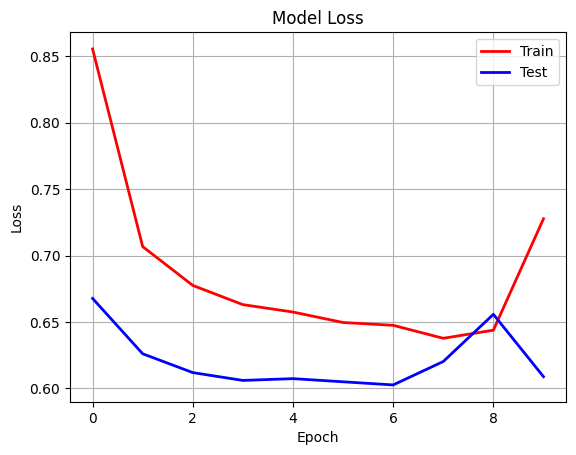

In [ ]:
# Model Evaluation
plt.plot(history["loss"], linewidth=2, label="Train", color = "r")
plt.plot(history["val_loss"], linewidth=2, label="Test", color = "b")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
error_df = pd.DataFrame({"Reconstruction_error": mse,
                         "True_class": y_test})
error_df.describe()

1781/1781 [==============================] - 2s 1ms/step


Reconstruction_error    True_class
count          56962.000000  56962.000000
mean               0.597274      0.001720
std                3.259297      0.041443
min                0.024154      0.000000
25%                0.165197      0.000000
50%                0.288670      0.000000
75%                0.488718      0.000000
max              291.787007      1.000000

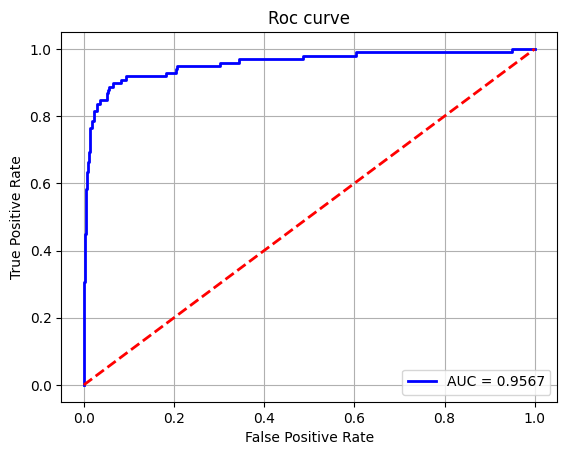

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_positive_rate, true_positive_rate,)

plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label="AUC = %0.4f"% roc_auc, color = "b")

plt.plot([0,1],[0,1], linewidth=2, color = "r", linestyle="dashed")

plt.legend(loc="lower right")
plt.title("Roc curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

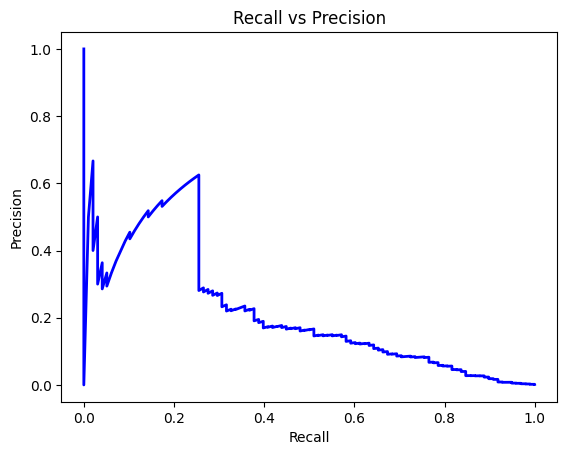

In [ ]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=2, color = "b")
plt.title("Recall vs Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

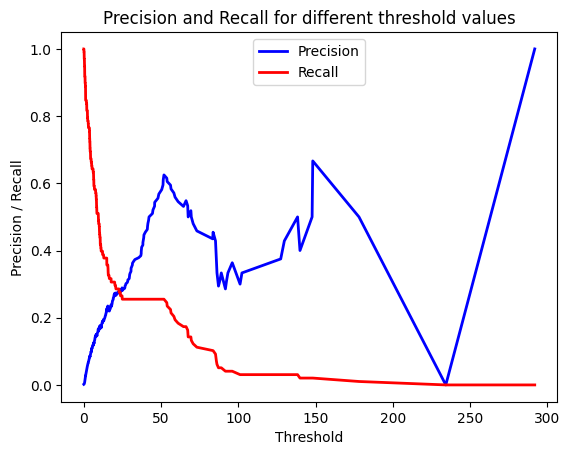

In [ ]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision", linewidth=2, color = "b")
plt.plot(threshold_rt, recall_rt[1:], label="Recall", linewidth=2, color = "r")
plt.title("Precision and Recall for different threshold values")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.legend()
plt.show()

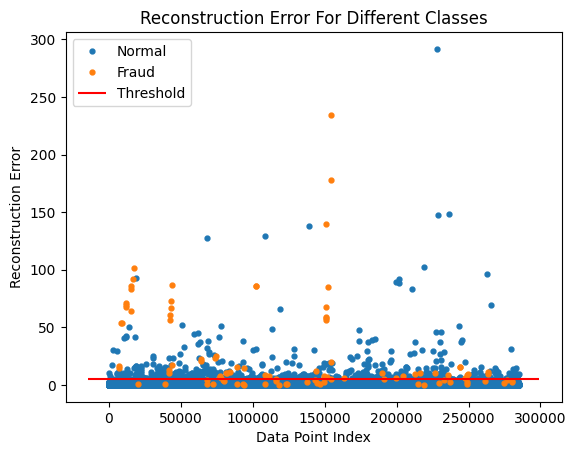

In [ ]:
threshold_fixed = 5
groups = error_df.groupby("True_class")
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker = "o", ms = 3.5, linestyle="",
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder = 100, label = "Threshold")
ax.legend(loc = "upper left")
plt.title("Reconstruction Error For Different Classes")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()

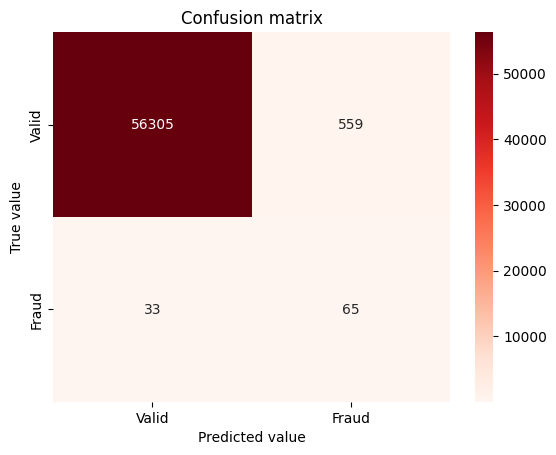

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values] 
conf_matrix = confusion_matrix(error_df.True_class, pred_y, labels = [0, 1])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels);
plt.title("Confusion matrix") 
plt.ylabel("True value") 
plt.xlabel("Predicted value") 
plt.show()